# Classification Network

The goal here is to classify whether the error rate is "low" "medium" or "high".
If we can successfully do this, then look at whether we can get the sign right. Start off by using the squeezenet model.

### Todos:
- [x] Add dense layer
- [x] Abstract images file
- [x] Write a models file 
- [ ] high resolution flow
- [ ] try adding flow and raw images


In [1]:
## Setup
from __future__ import print_function
import time, os, json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import csv

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def get_session():
    """Create a session that dynamically allocates memory."""
    # See: https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    session = tf.Session(config=config)
    return session

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


Loading vector data
Loading image data
Preprocessing data
Input shape:  (9400, 48, 64, 2)


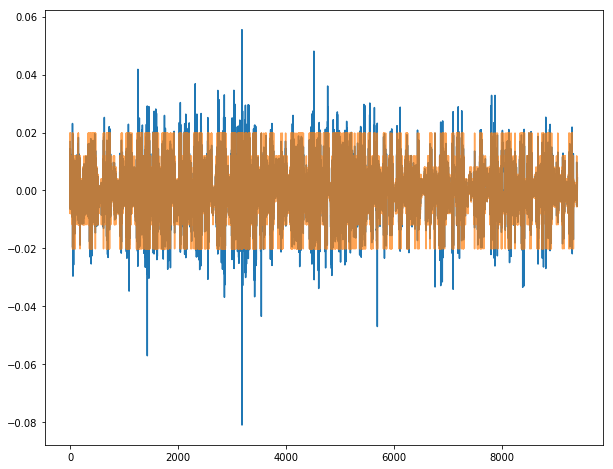

In [2]:
BATCH_SIZE = 1024
NUM_CLASSES = 16
TRAIN_RATIO = 0.6

import utilities
# Datafile options:
imu_data,x_data,y_norm = utilities.load_data('/media/Big_Data/stefantj/flows_lowres_16k.npy')
#imu_data,flows_data,y_norm = utilities.load_data('../gbucket/center_cropped_300x300.npy')
#imu_data,x_data,y_norm = utilities.load_data('../gbucket/center_cropped_192x192.npy')

# Split into training/val data:
N_training = int(TRAIN_RATIO*x_data.shape[0])
N_validation = x_data.shape[0]- N_training

y_data, mean_vals = utilities.discretize_outputs(y_norm[0:N_training], NUM_CLASSES)
y_data, tmp = utilities.discretize_outputs(y_norm, NUM_CLASSES)

x_train = x_data[0:N_training,...]
y_train = y_data[0:N_training]

x_val = x_data[N_training:,...]
y_val = y_data[N_training:]

print('Input shape: ', x_data.shape)

# Plot the discretization with perfect classification:
plt.plot(y_norm)
plt.plot(mean_vals[y_data.astype(np.int32)],alpha=0.7)



In [3]:
from classifiers.squeezenet import SqueezeNet

with tf.device('/gpu:0'):
    tf.reset_default_graph() # remove all existing variables in the graph 
    sess = get_session() # start a new Session

    # Load the model:
    model = SqueezeNet(NUM_CLASSES, x_data.shape[3], x_data.shape[1])
    # If you want a pretrained model, pass save_path as an argument. 
    # Since pretrained weights didn't do well, let's skip them. 
    # SAVE_PATH = 'classifiers/squeezenet.ckpt'

    # Slow way to initialize variables that is robust to partially loaded models:
    uninitialized_vars = []
    for var in tf.global_variables():
        try:
            sess.run(var)
        except tf.errors.FailedPreconditionError:
            uninitialized_vars.append(var)

    init = tf.variables_initializer(uninitialized_vars)
    sess.run(init)

    saver = tf.train.Saver()
#    saver.restore(sess, './checkpoints/good_run') # Assumes N_classes = 128, batch_size = 64
#    saver.restore(sess, './checkpoints/classification_model-31200')
    saver.restore(sess, tf.train.latest_checkpoint('.'))

(9400, 48, 64, 2)
Step:  0  Train Acc:  0.455556  Val Acc:  0.0813954 loss 41.8938 LR:  0.000196


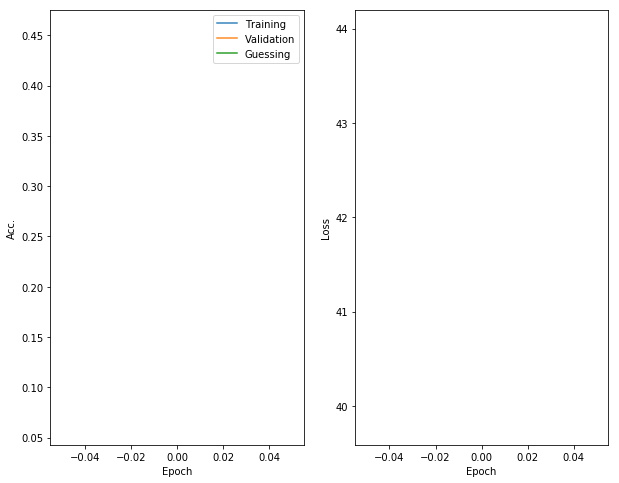

RMSE:  0.00830308636543
Ratio to zero-prediction:  0.994958967183
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.50427791630325947)


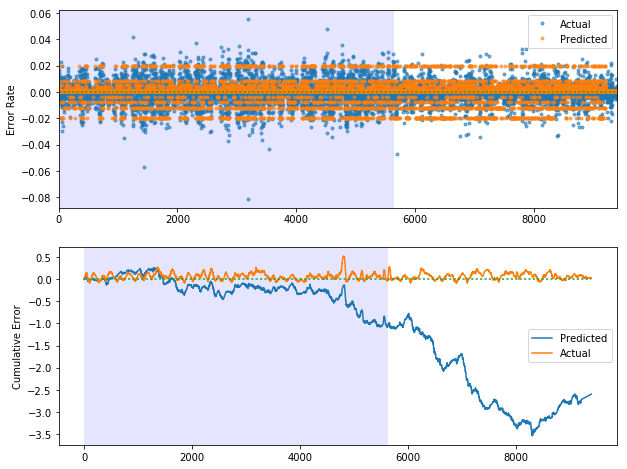

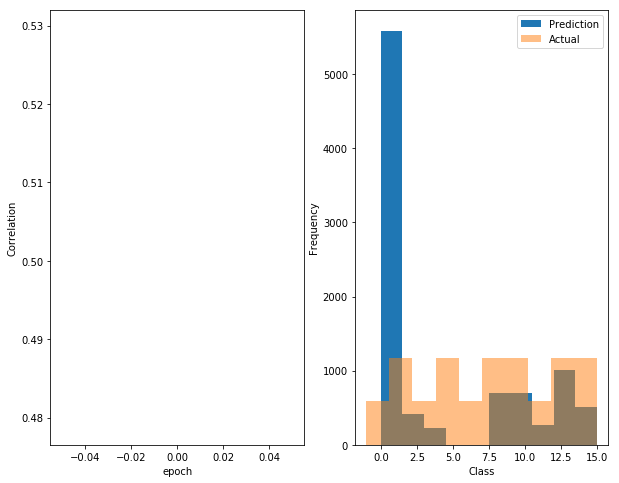

Step:  1000  Train Acc:  0.458659772075  Val Acc:  0.111111 loss 42.5093912877 LR:  0.000184473632


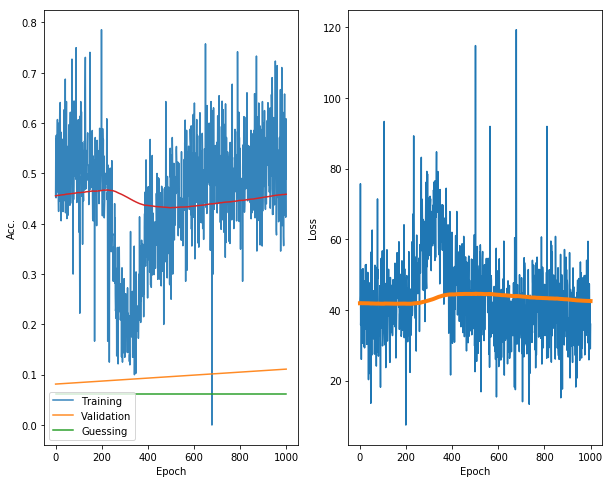

RMSE:  0.00839599933728
Ratio to zero-prediction:  1.00609273003
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.49700317698158986)


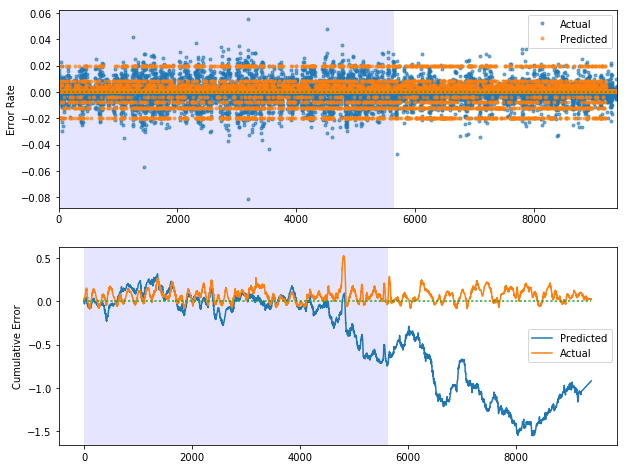

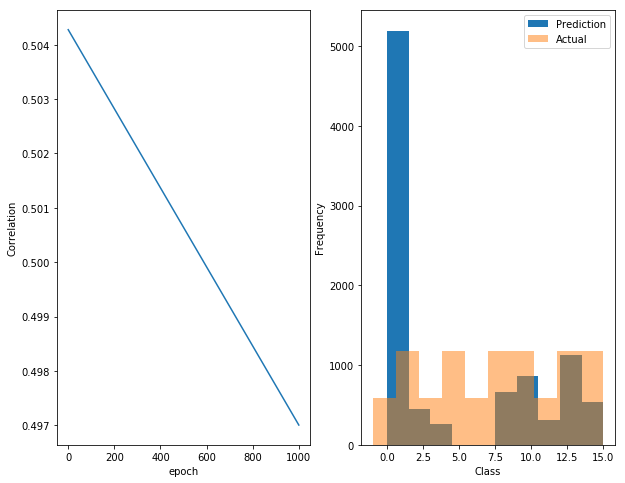

Step:  2000  Train Acc:  0.490976711944  Val Acc:  0.181818 loss 40.9781658618 LR:  0.000173625106649


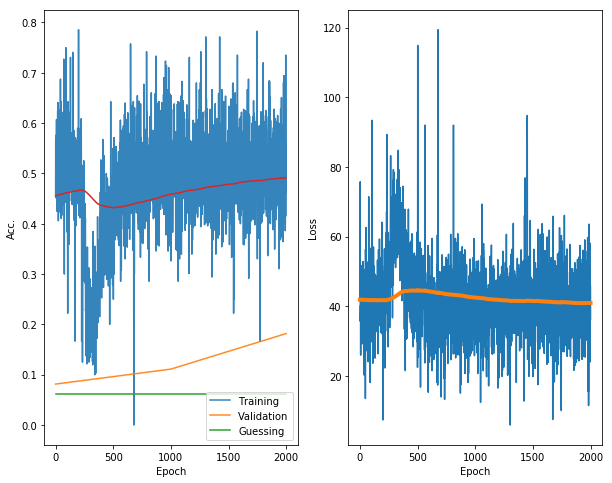

RMSE:  0.00840238003895
Ratio to zero-prediction:  1.00685732961
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.50174374903685748)


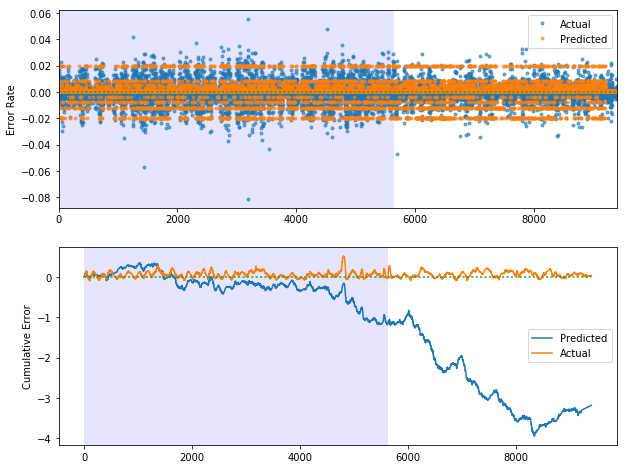

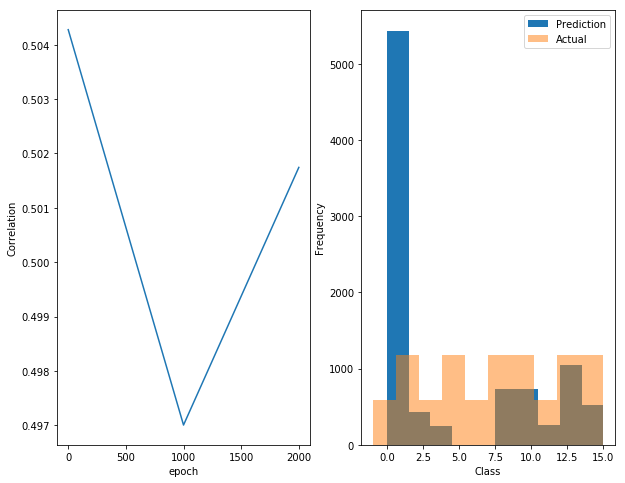

Step:  3000  Train Acc:  0.502908412673  Val Acc:  0.0 loss 40.9177137635 LR:  0.00016014627015


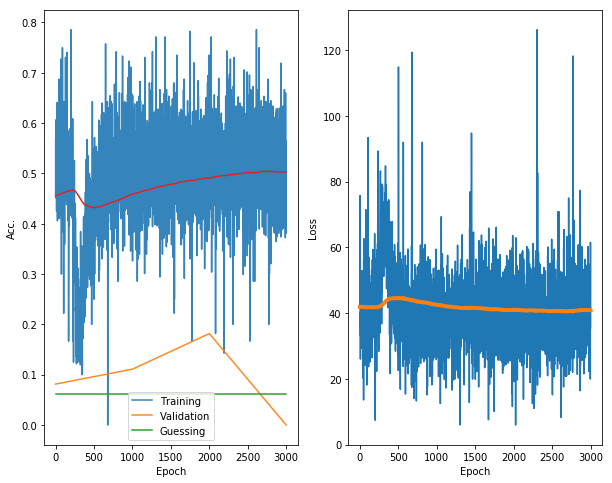

RMSE:  0.00829080873214
Ratio to zero-prediction:  0.993487738196
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.50901563169872843)


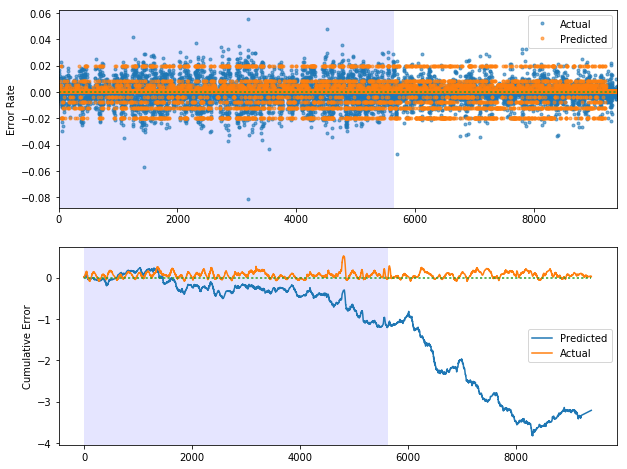

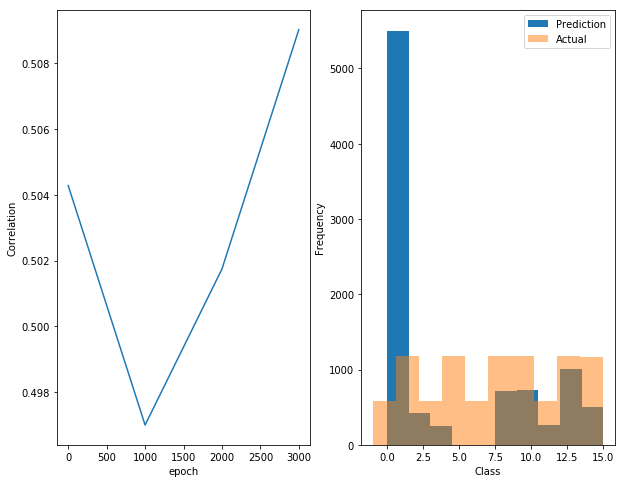

Step:  4000  Train Acc:  0.507052268224  Val Acc:  0.0714286 loss 40.4119600254 LR:  0.000150728388295


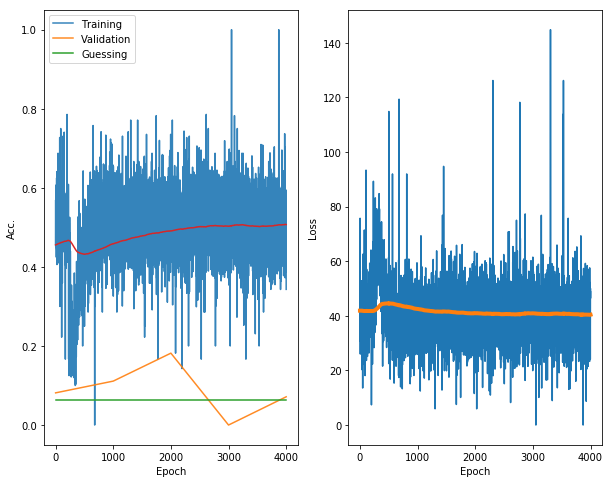

RMSE:  0.00841036668244
Ratio to zero-prediction:  1.00781436922
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.50097162578969323)


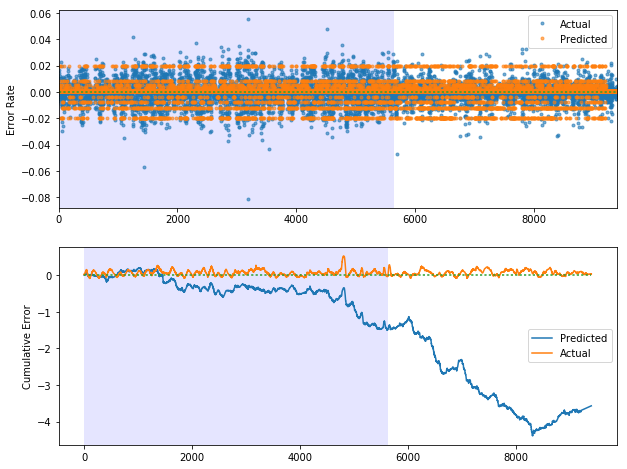

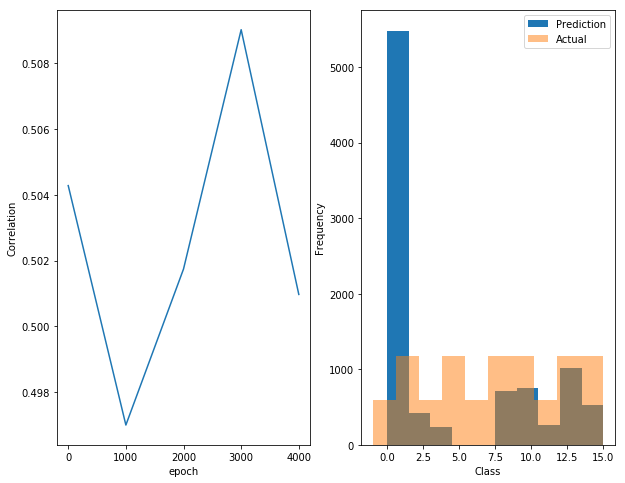

Step:  5000  Train Acc:  0.510251368493  Val Acc:  0.05 loss 40.2938580014 LR:  0.000141864353236


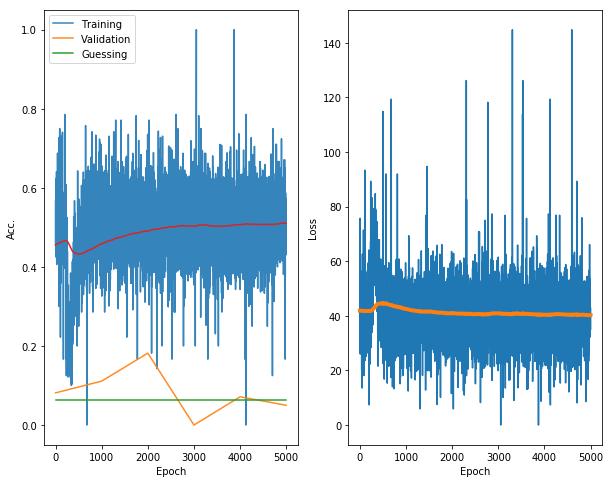

RMSE:  0.00826028833933
Ratio to zero-prediction:  0.989830479056
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.50938373114937507)


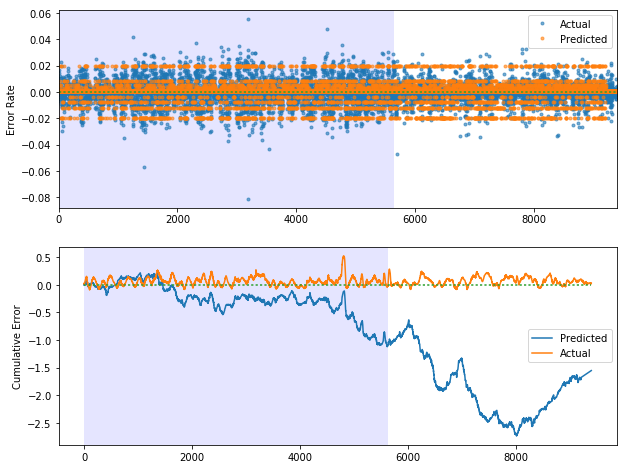

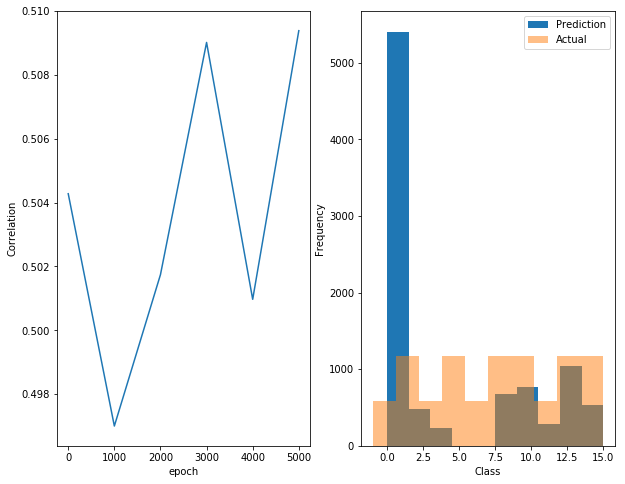

Step:  6000  Train Acc:  0.511507909093  Val Acc:  0.0384615 loss 40.7396184824 LR:  0.000130851162464


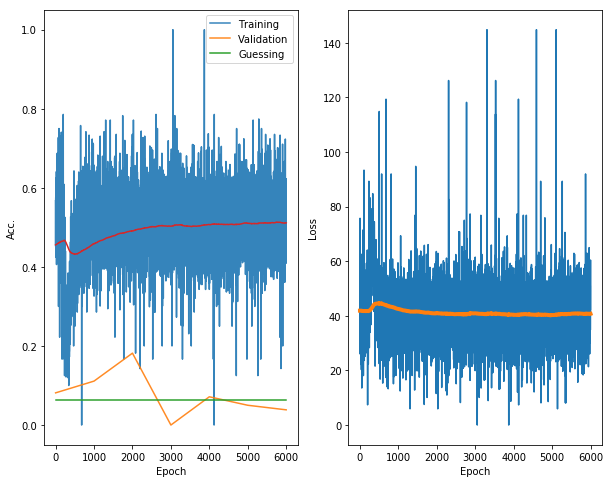

RMSE:  0.00825606932304
Ratio to zero-prediction:  0.989324914268
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51058712466651823)


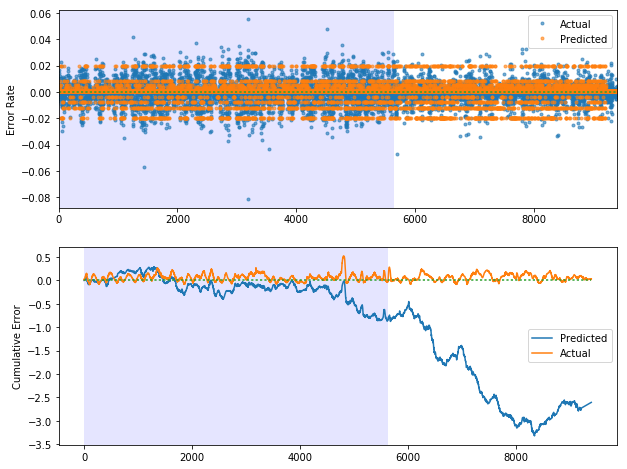

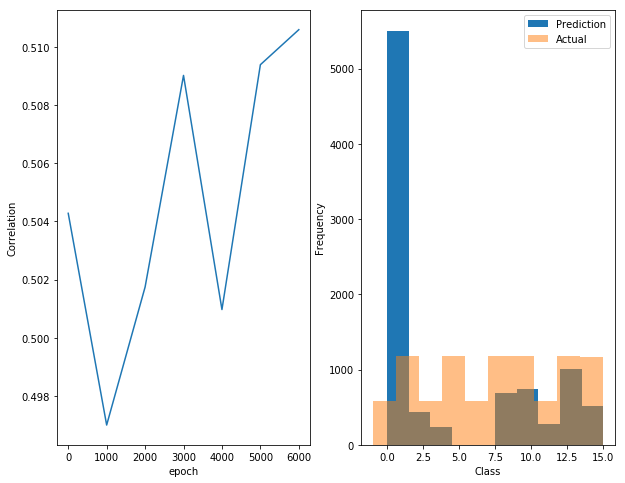

Step:  7000  Train Acc:  0.507504477818  Val Acc:  0.0377358 loss 41.2835227038 LR:  0.000123156067302


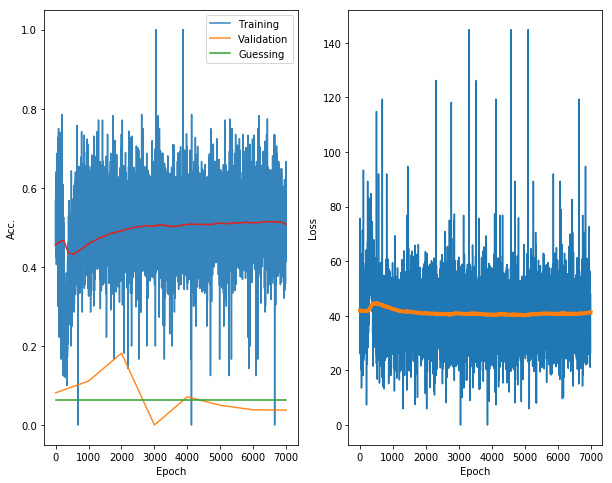

RMSE:  0.00905896683769
Ratio to zero-prediction:  1.08553613583
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.451545452327695)


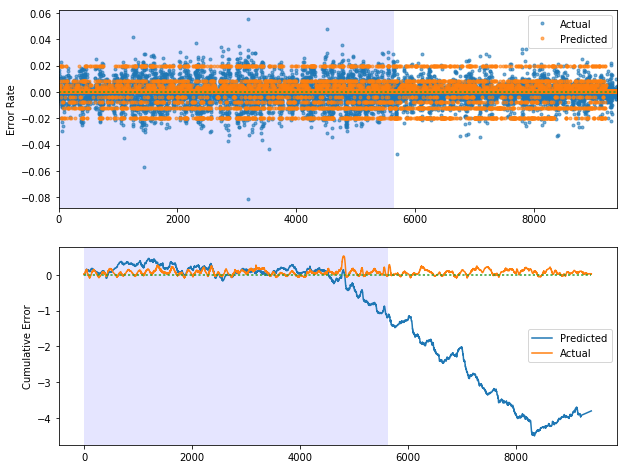

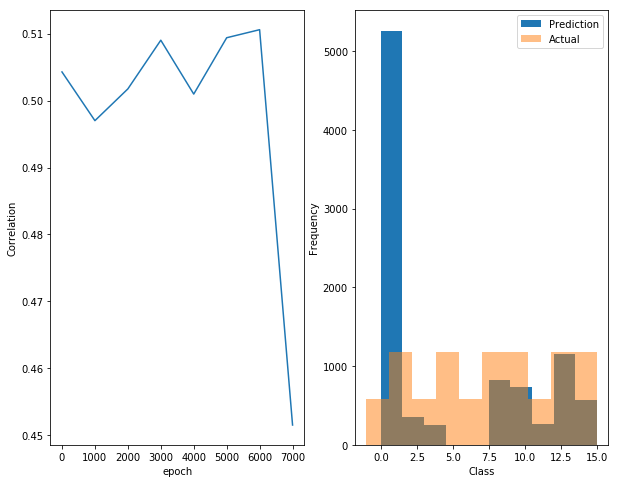

Step:  8000  Train Acc:  0.511294596504  Val Acc:  0.0980392 loss 40.7177290387 LR:  0.000115913505296


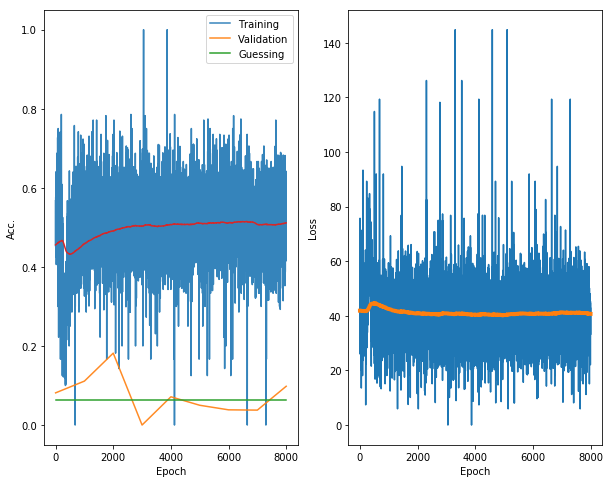

RMSE:  0.00816096098828
Ratio to zero-prediction:  0.977928081048
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51533071949200226)


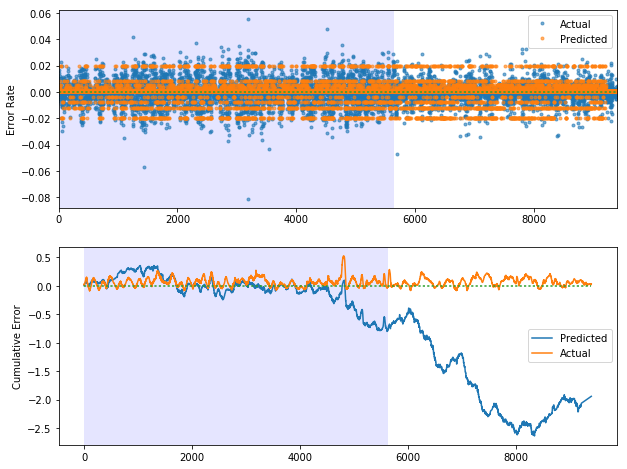

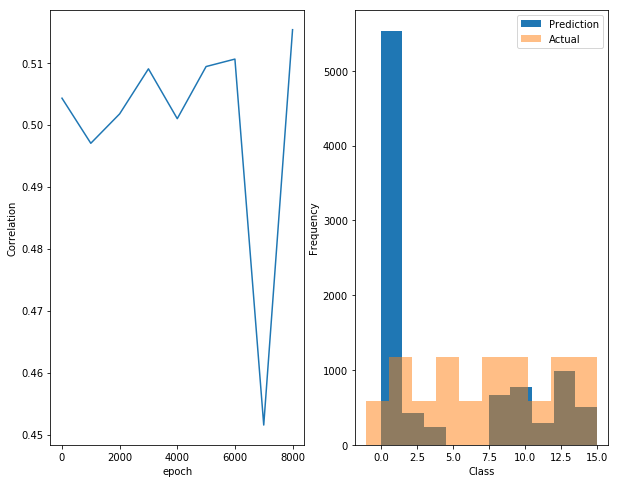

Step:  9000  Train Acc:  0.515384211315  Val Acc:  0.0833333 loss 40.7606165864 LR:  0.000106914926599


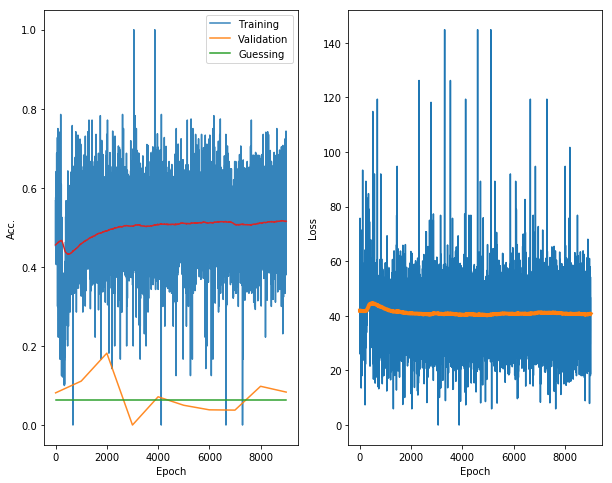

RMSE:  0.00818701452033
Ratio to zero-prediction:  0.981050076195
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51400720072155814)


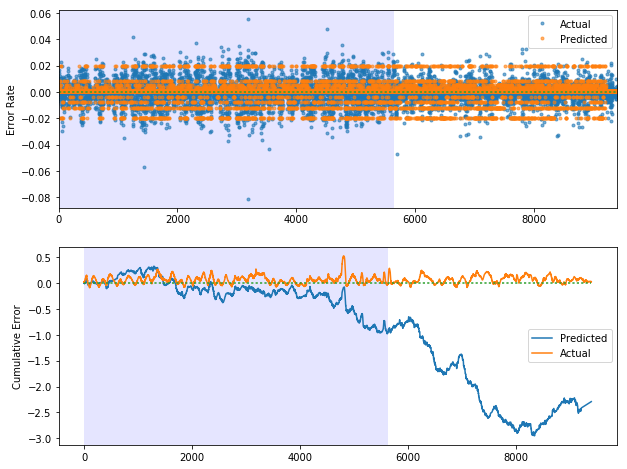

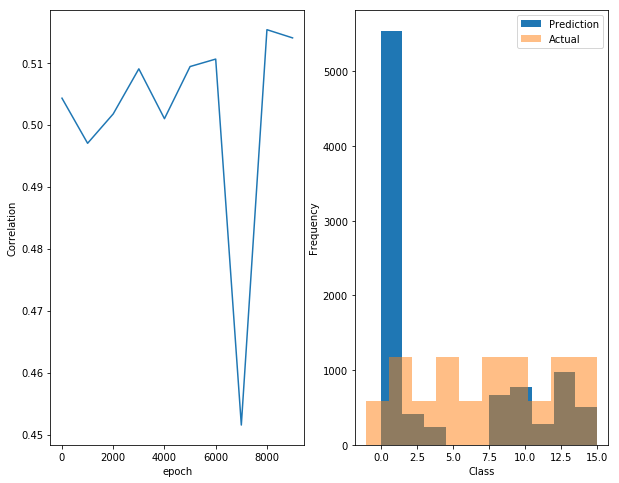

Step:  10000  Train Acc:  0.51539424919  Val Acc:  0.0169492 loss 40.761360962 LR:  0.000100627473596


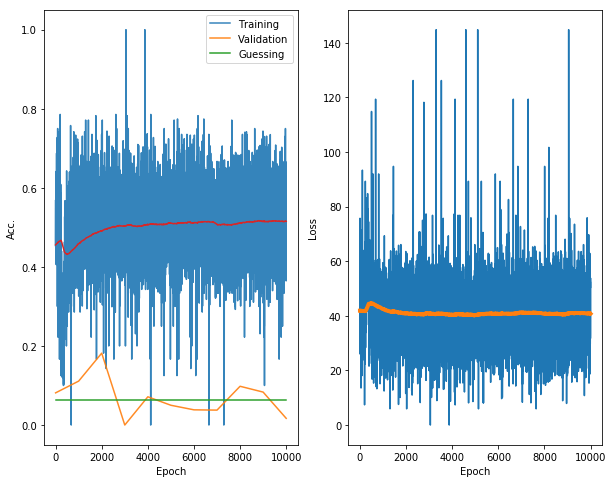

RMSE:  0.00820581949791
Ratio to zero-prediction:  0.983303476948
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.5126533611606533)


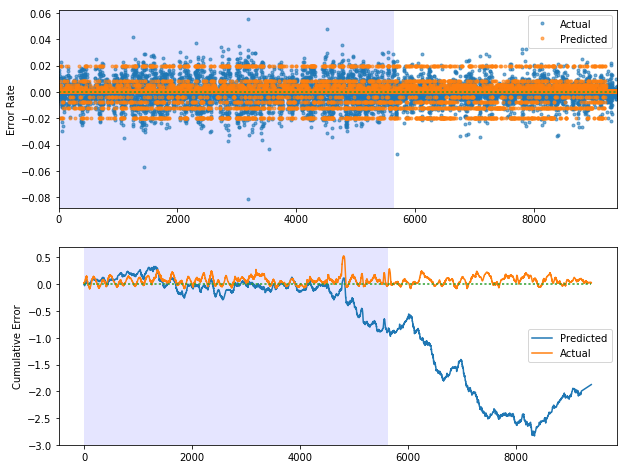

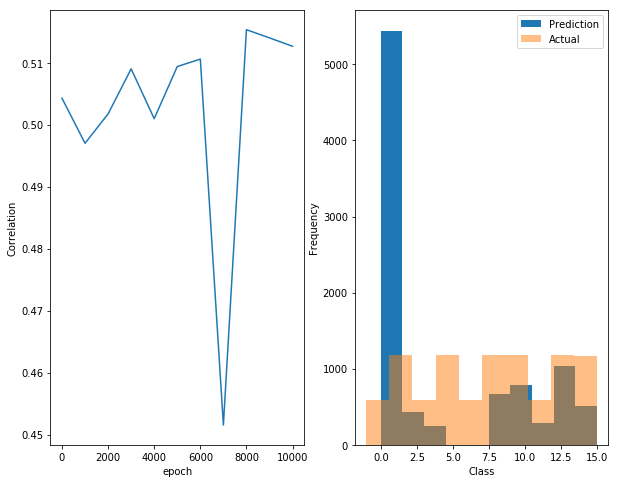

Step:  11000  Train Acc:  0.514976495381  Val Acc:  0.0617284 loss 40.8026532784 LR:  9.47097731283e-05


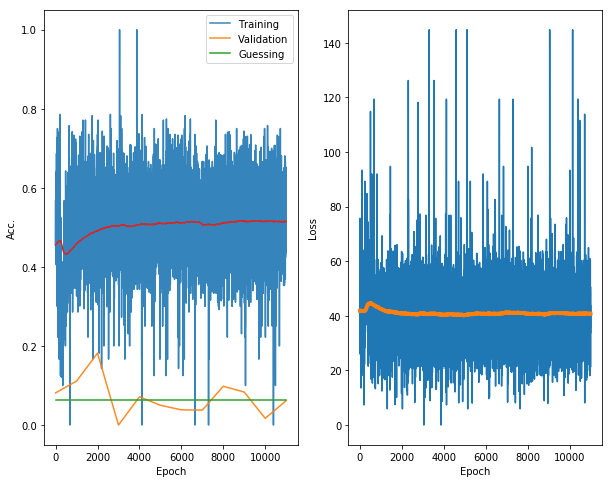

RMSE:  0.00819079039546
Ratio to zero-prediction:  0.98150253937
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51406100883385097)


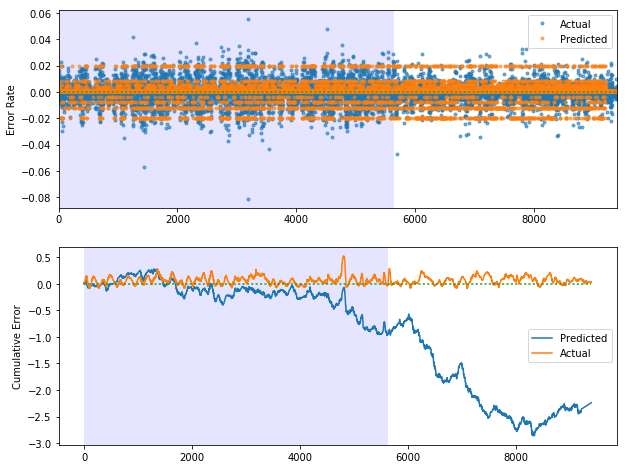

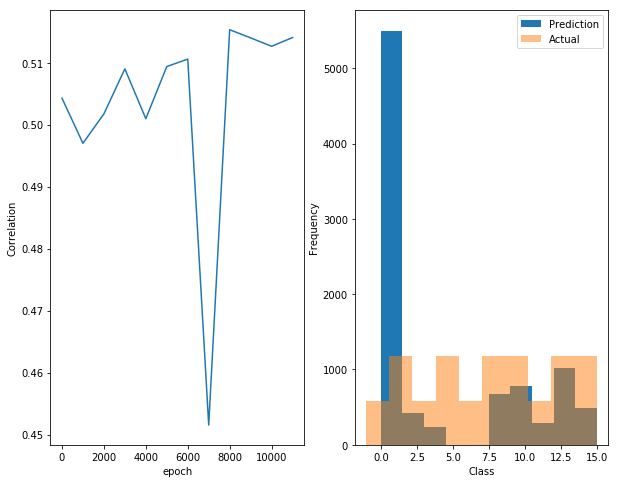

Step:  12000  Train Acc:  0.515957663871  Val Acc:  0.125 loss 41.0384337018 LR:  8.73572791744e-05


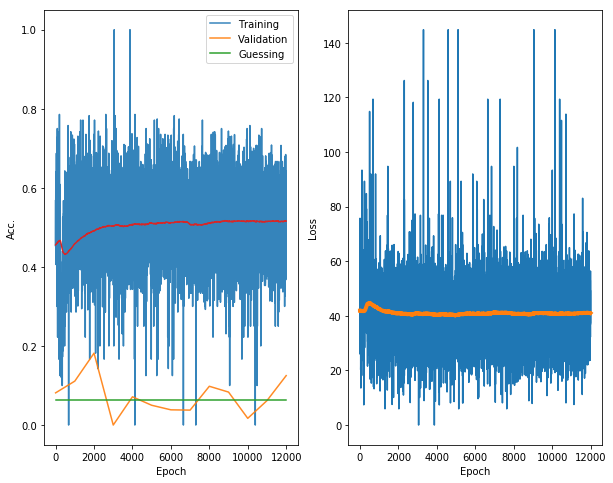

RMSE:  0.00821182870029
Ratio to zero-prediction:  0.984023559762
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51301804832247044)


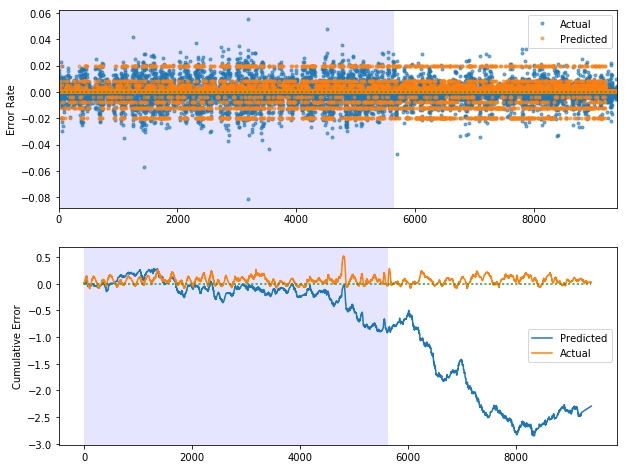

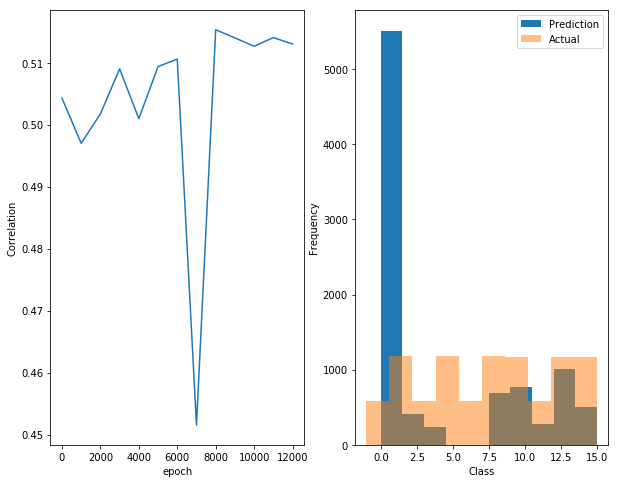

Step:  13000  Train Acc:  0.51385441218  Val Acc:  0.0 loss 41.194546231 LR:  8.22199723007e-05


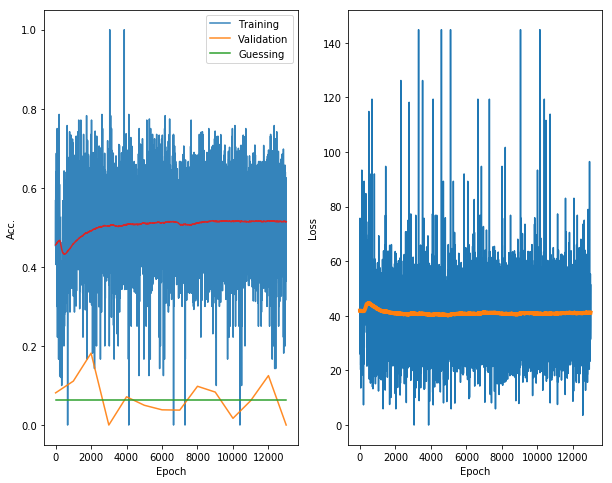

RMSE:  0.00817204170758
Ratio to zero-prediction:  0.979255883813
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51631177575409459)


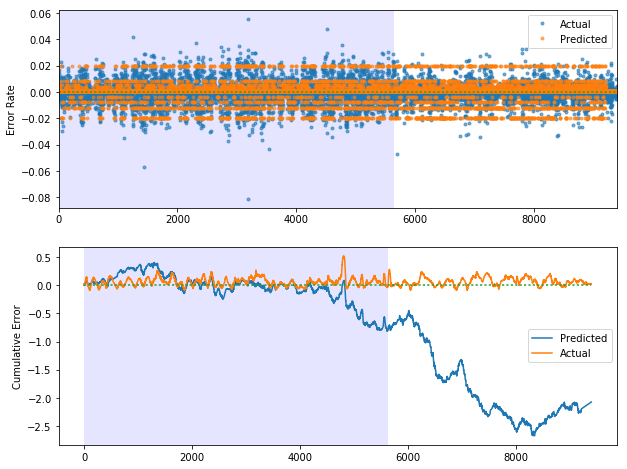

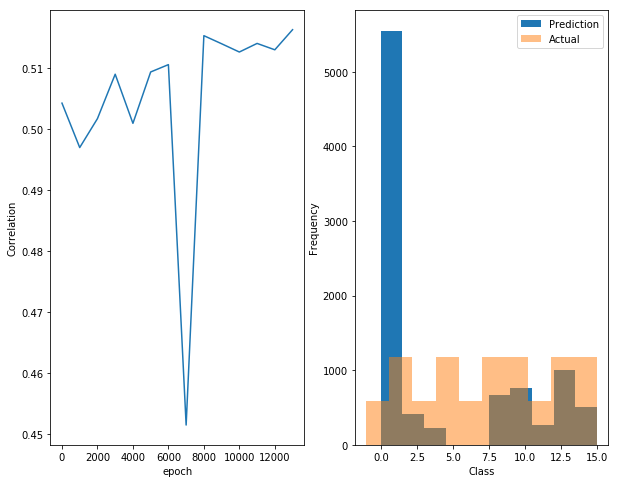

Step:  14000  Train Acc:  0.510222441769  Val Acc:  0.0967742 loss 41.0971942852 LR:  7.73847801696e-05


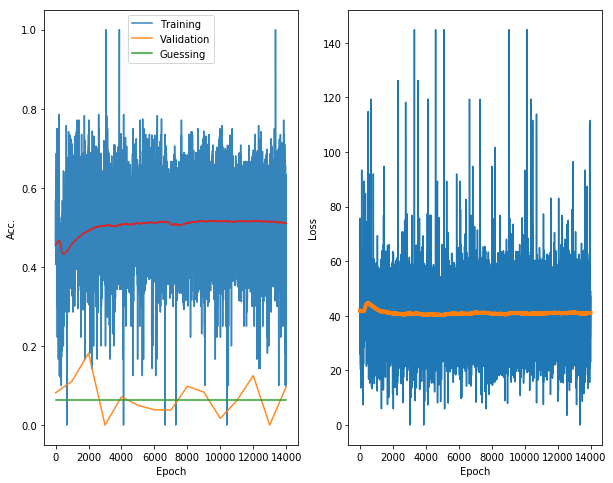

RMSE:  0.00820819310592
Ratio to zero-prediction:  0.983587906433
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51334903311585156)


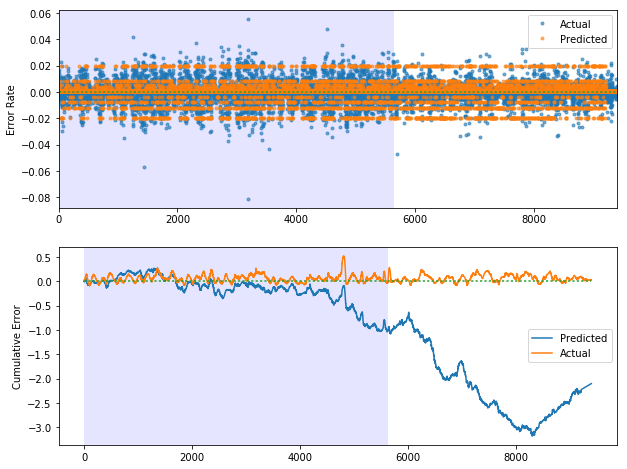

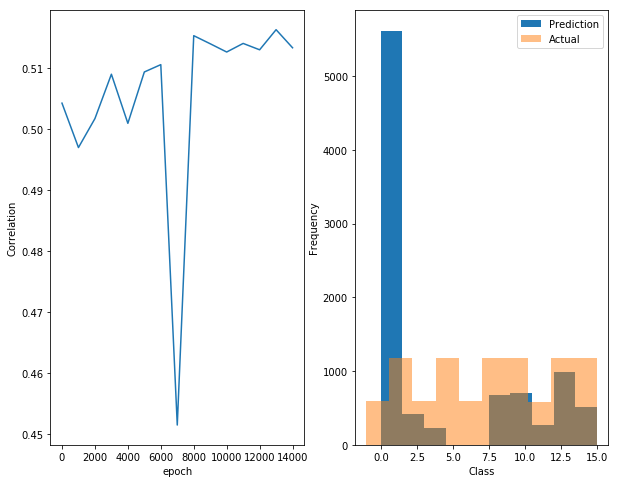

Step:  15000  Train Acc:  0.513548265334  Val Acc:  0.0493827 loss 41.2476437953 LR:  7.13772572971e-05


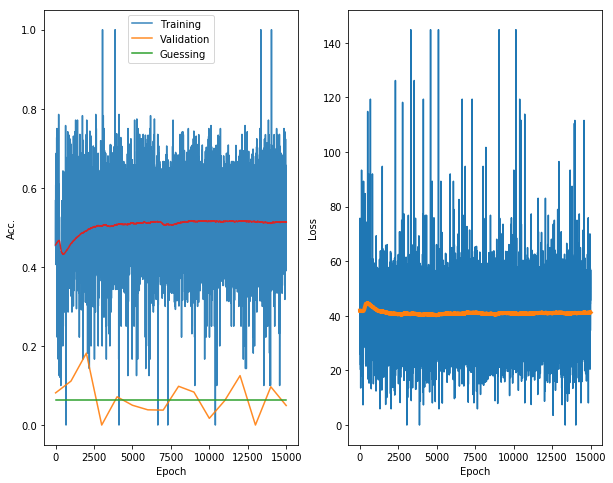

RMSE:  0.00816166505149
Ratio to zero-prediction:  0.978012448953
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.5177063014403398)


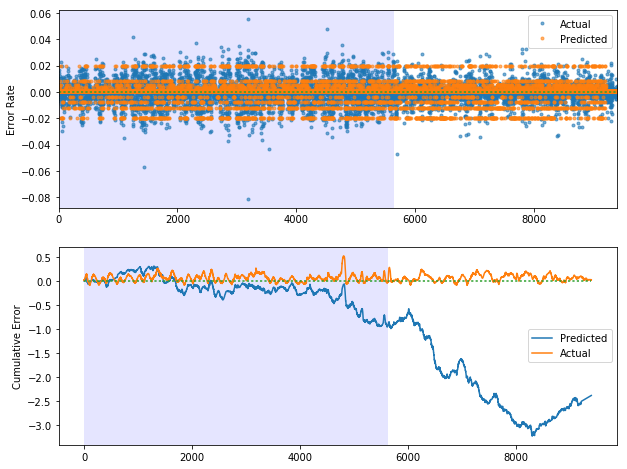

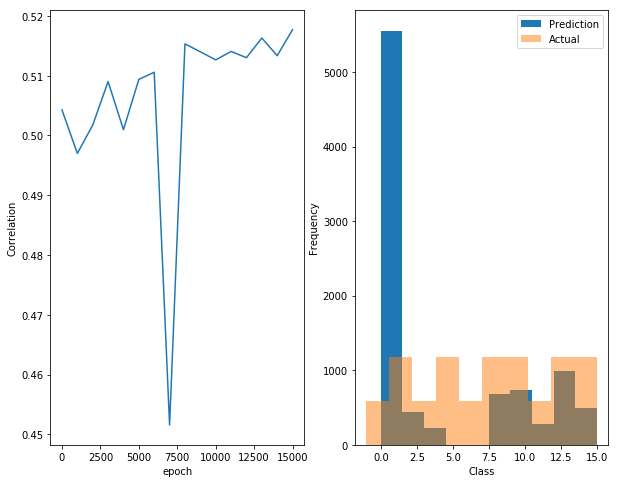

Step:  16000  Train Acc:  0.516874795085  Val Acc:  0.0759494 loss 40.8709686352 LR:  6.71797035499e-05


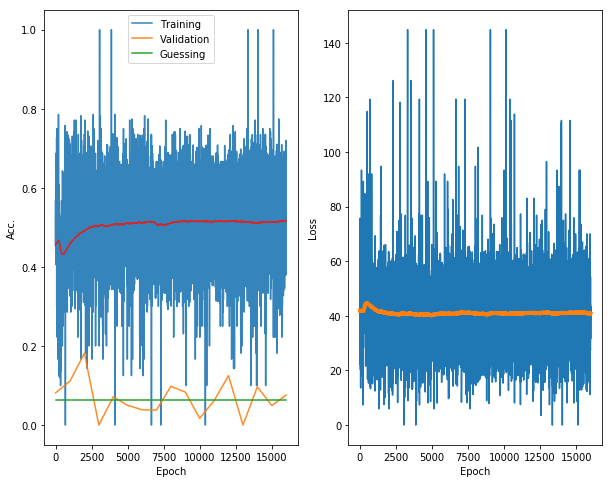

RMSE:  0.00815735807574
Ratio to zero-prediction:  0.977496343983
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51750357407935099)


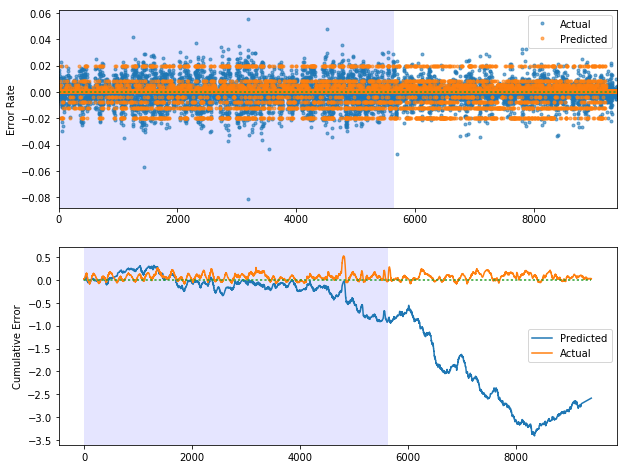

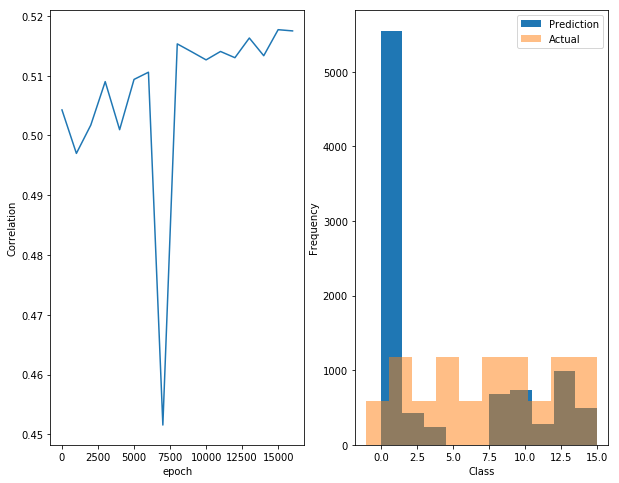

Step:  17000  Train Acc:  0.515486246829  Val Acc:  0.0714286 loss 40.717239855 LR:  6.32289995436e-05


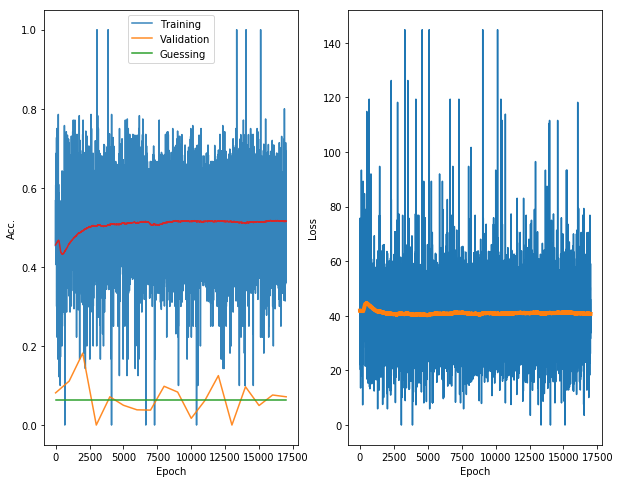

RMSE:  0.00828844170504
Ratio to zero-prediction:  0.993204097303
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51029347337529984)


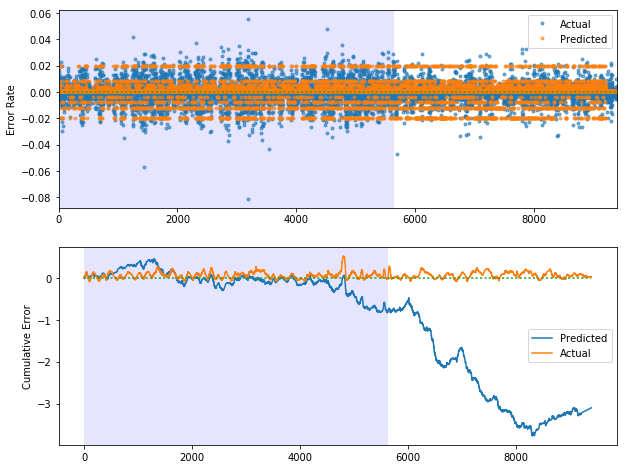

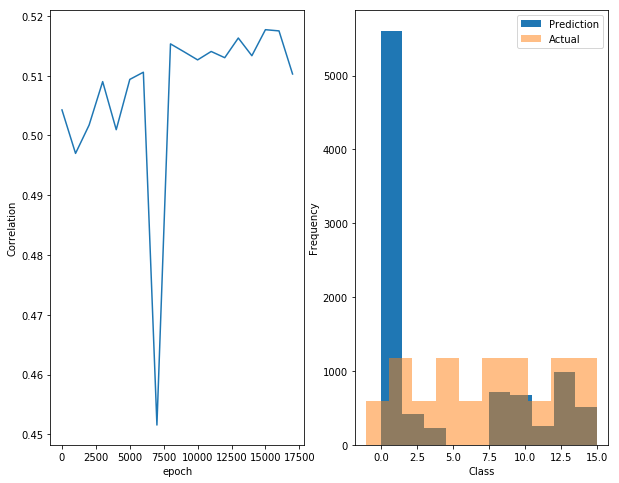

Step:  18000  Train Acc:  0.517994479464  Val Acc:  0.0217391 loss 40.7242517656 LR:  5.83204159677e-05


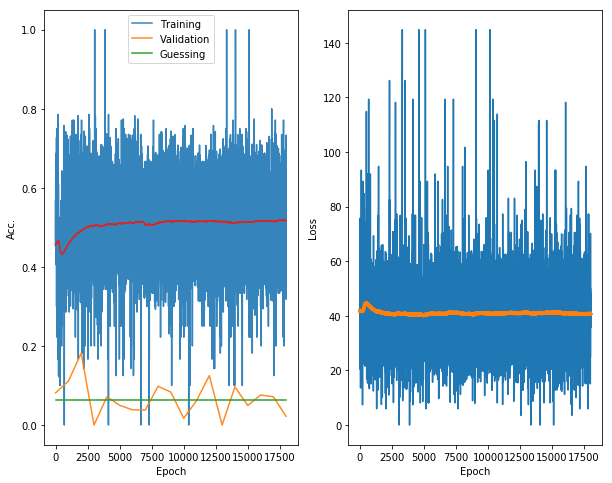

RMSE:  0.00814054128049
Ratio to zero-prediction:  0.975481187149
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51854037265204289)


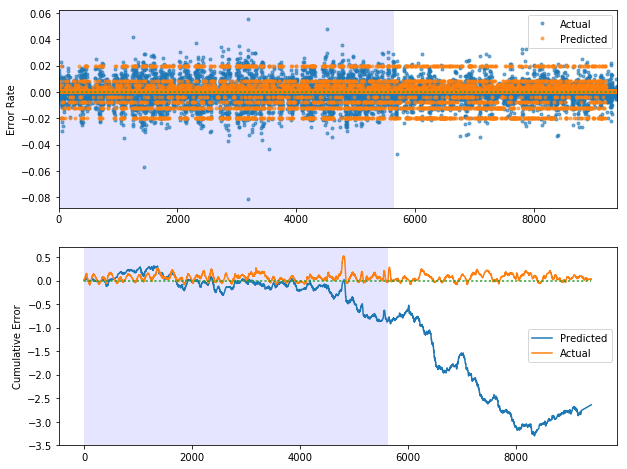

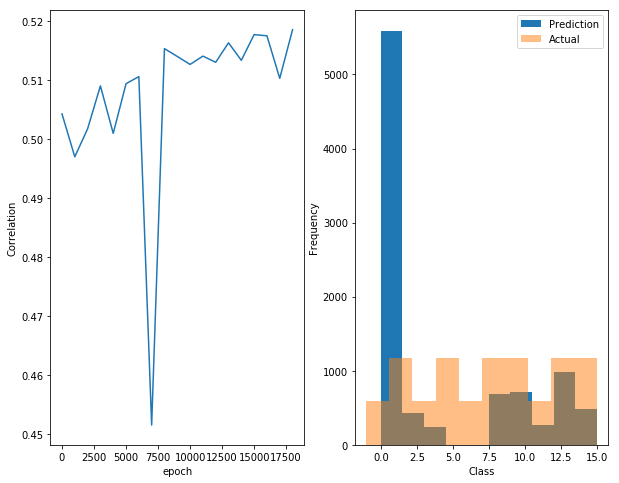

Step:  19000  Train Acc:  0.515264766647  Val Acc:  0.0857143 loss 40.8320557418 LR:  5.48907089454e-05


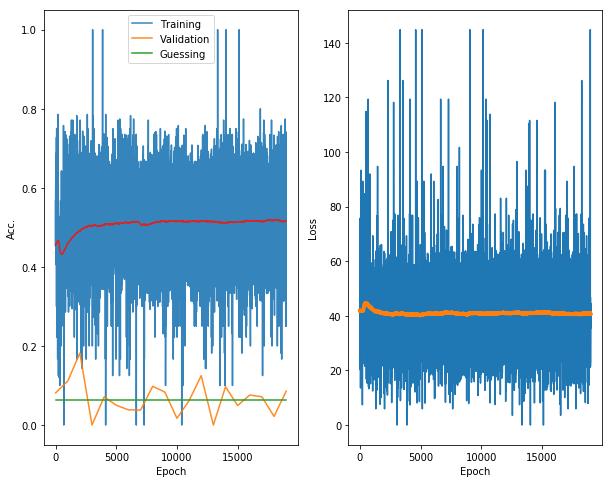

RMSE:  0.00807042734997
Ratio to zero-prediction:  0.967079433774
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.5234023755574595)


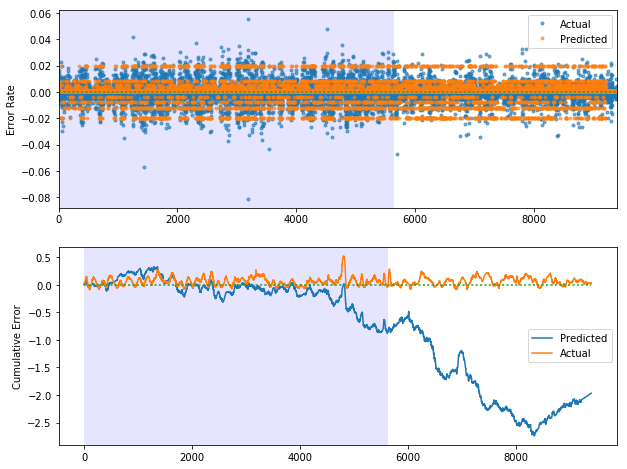

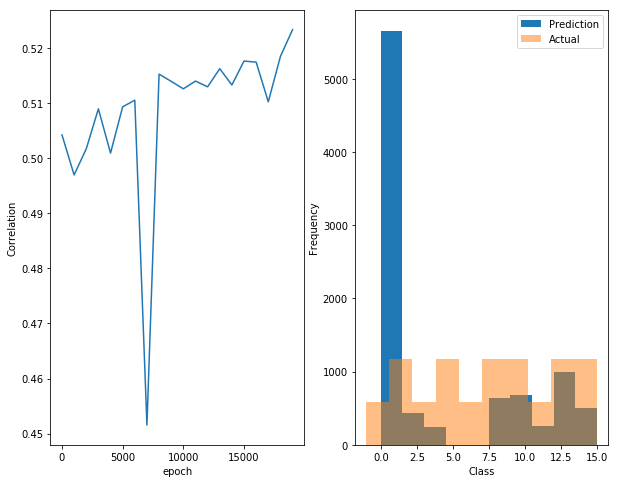

Step:  20000  Train Acc:  0.515972297161  Val Acc:  0.0243902 loss 40.9735217807 LR:  5.16626961338e-05


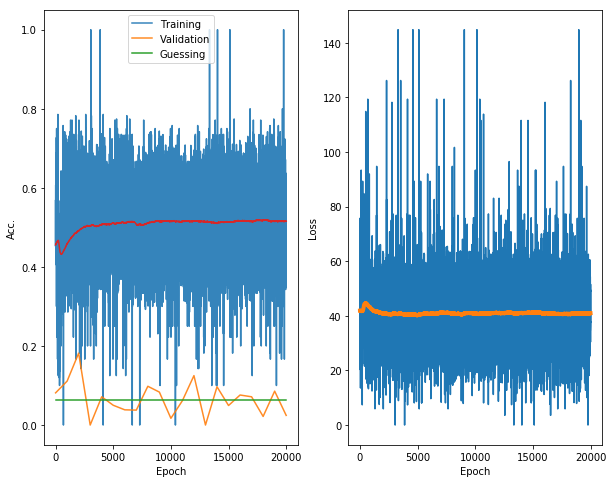

RMSE:  0.00813579960745
Ratio to zero-prediction:  0.974912992395
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51839355935508347)


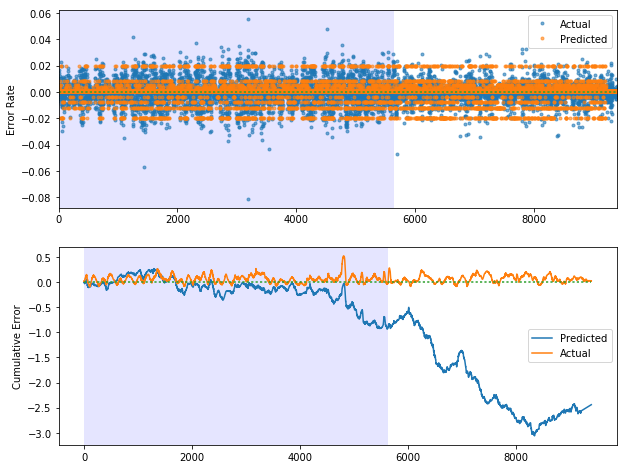

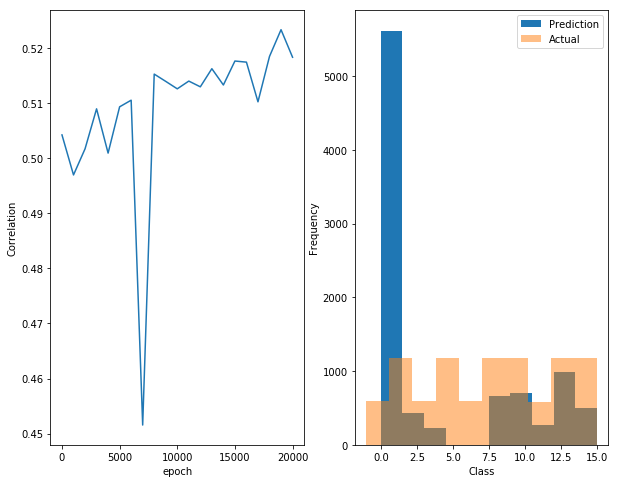

Step:  21000  Train Acc:  0.519150917531  Val Acc:  0.0714286 loss 40.6171329403 LR:  4.76520259735e-05


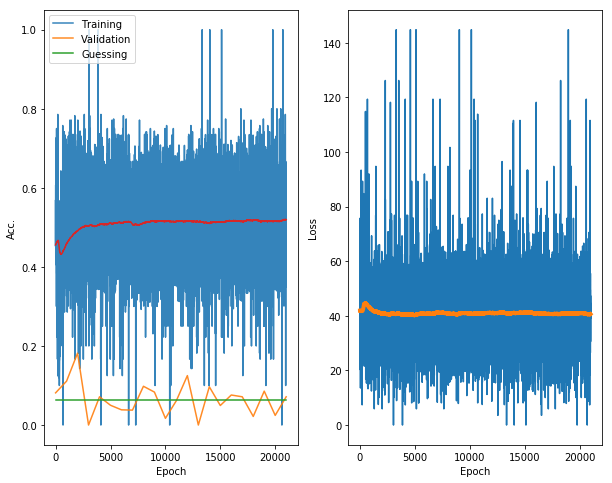

RMSE:  0.00814399403326
Ratio to zero-prediction:  0.975894930567
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51700464065609741)


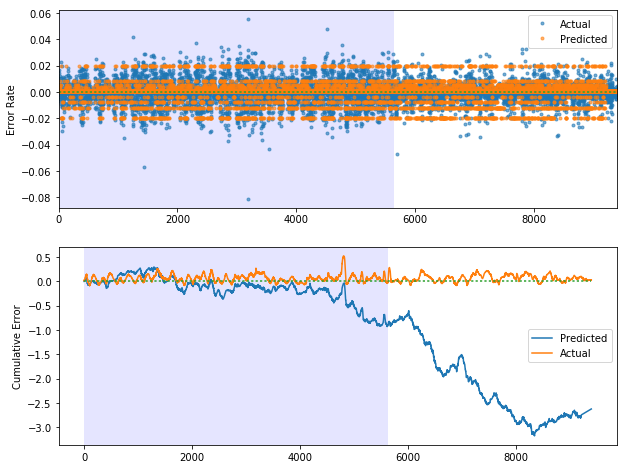

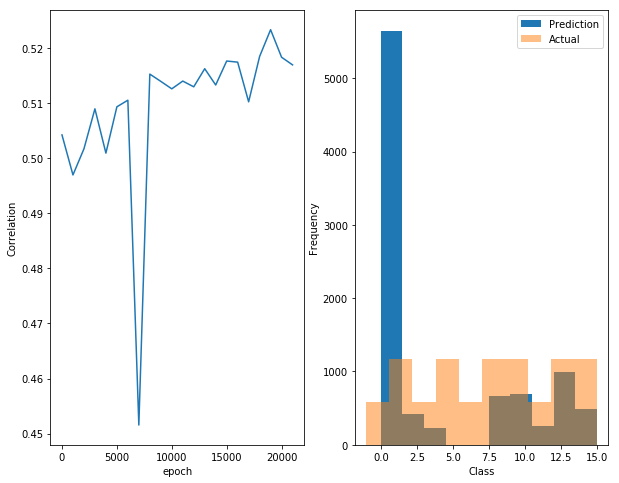

Step:  22000  Train Acc:  0.516674005738  Val Acc:  0.0405405 loss 40.9276348032 LR:  4.48497056301e-05


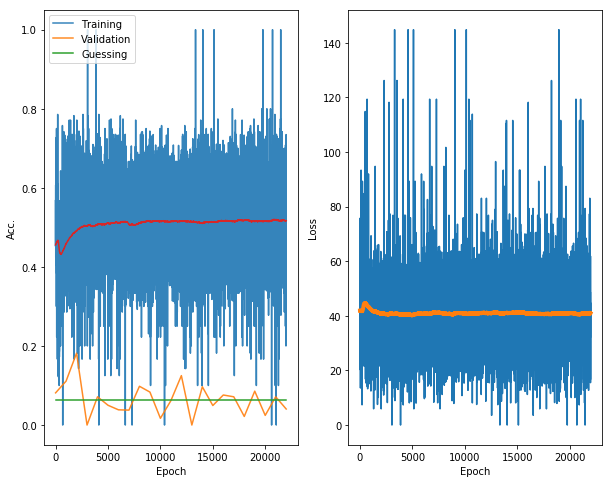

RMSE:  0.00814623074872
Ratio to zero-prediction:  0.976162956214
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51662608995075665)


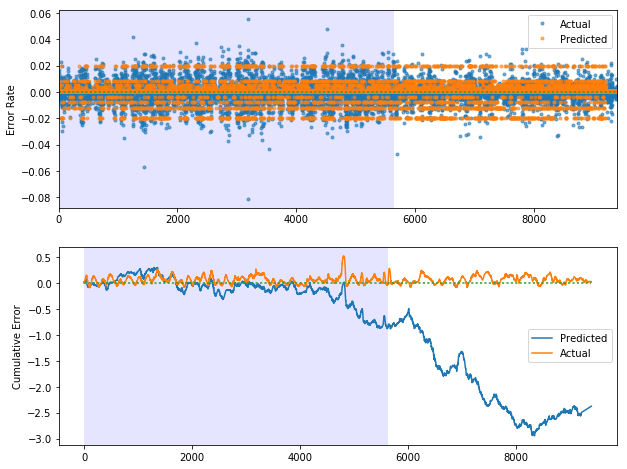

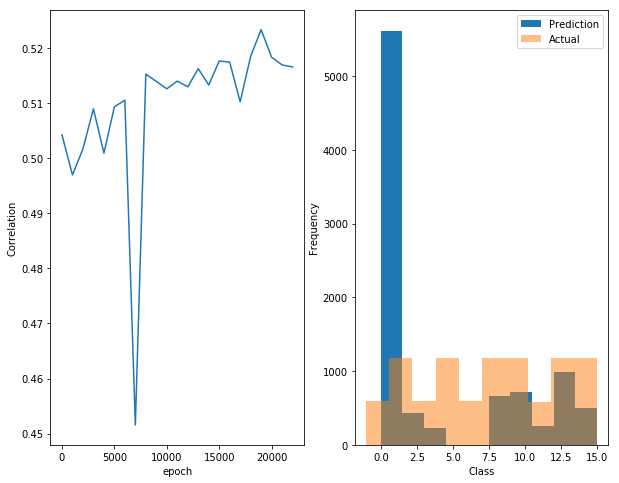

Step:  23000  Train Acc:  0.514627860214  Val Acc:  0.091954 loss 40.7962693126 LR:  4.22121841414e-05


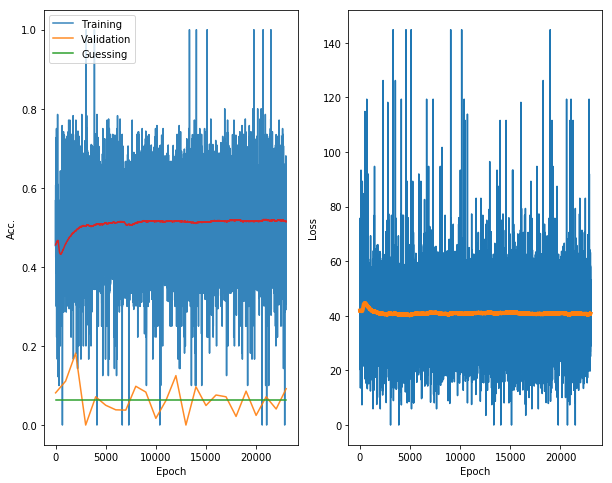

RMSE:  0.00817959882447
Ratio to zero-prediction:  0.980161453246
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.5155386021535906)


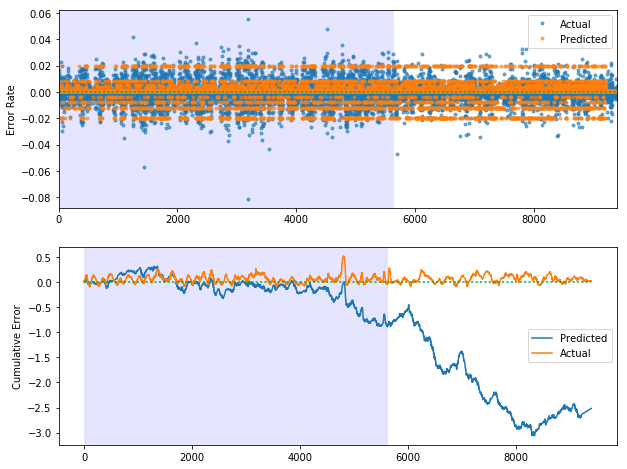

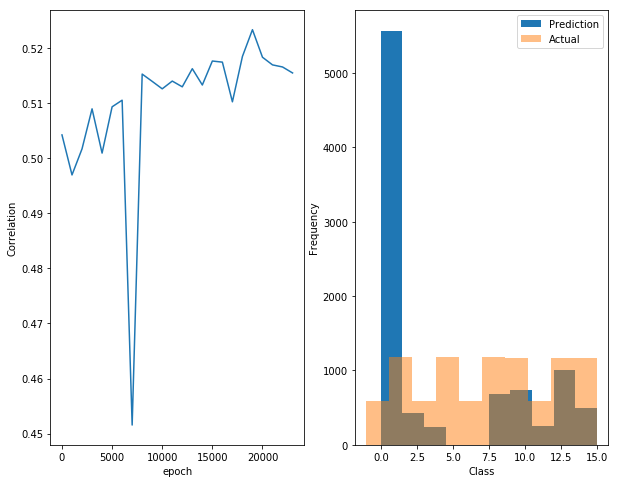

Step:  24000  Train Acc:  0.516097025748  Val Acc:  0.084507 loss 40.9578145601 LR:  3.89351746161e-05


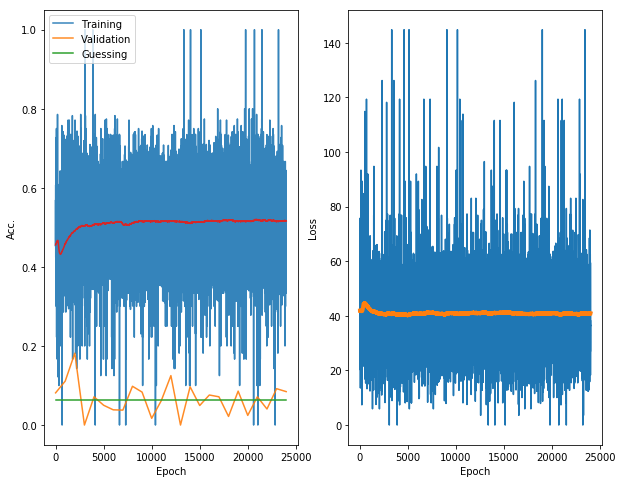

RMSE:  0.00814996372922
Ratio to zero-prediction:  0.976610279325
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51666661624637933)


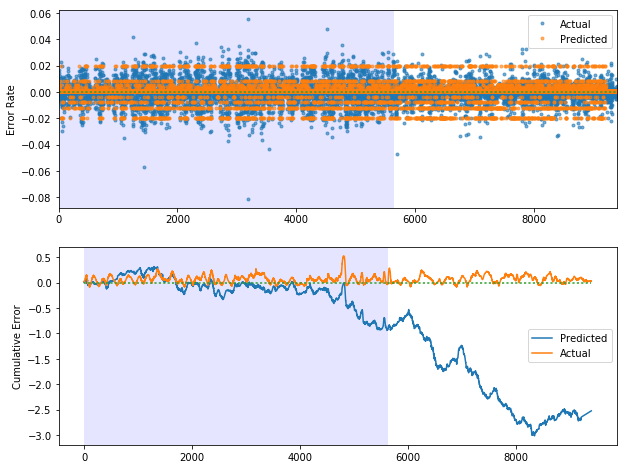

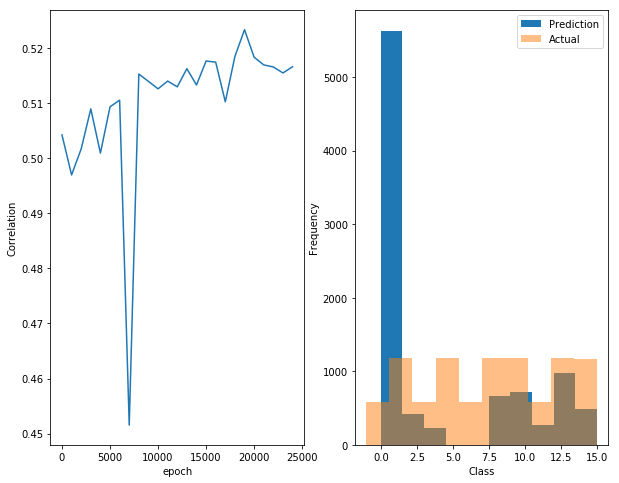

Step:  25000  Train Acc:  0.516052015062  Val Acc:  0.0704225 loss 41.0471435611 LR:  3.66454748673e-05


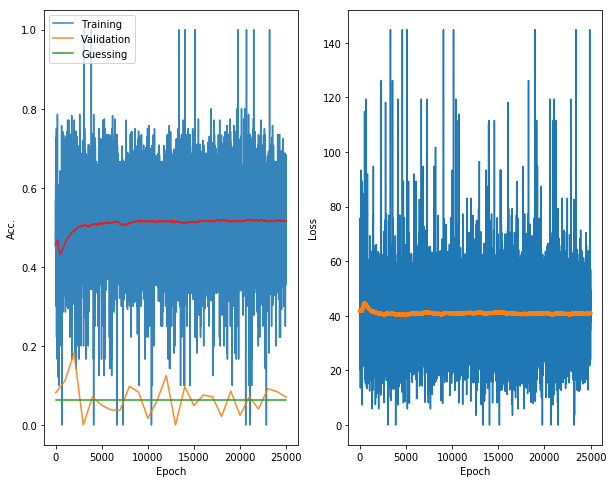

RMSE:  0.00809731405892
Ratio to zero-prediction:  0.970301268522
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.518725982786305)


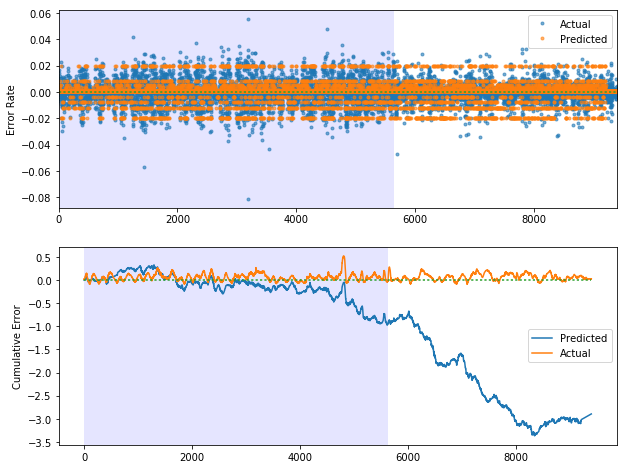

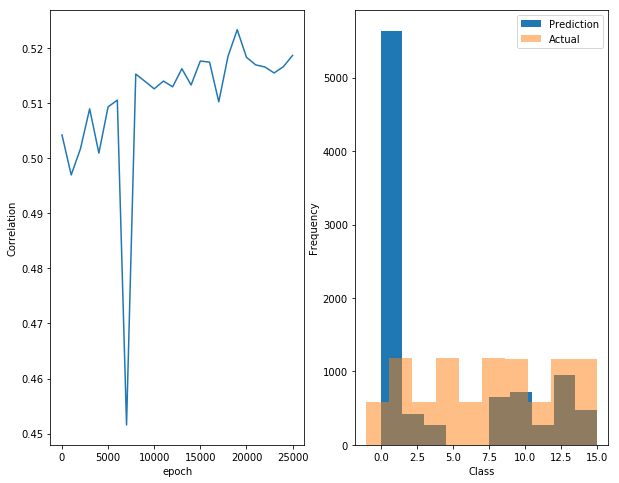

Step:  26000  Train Acc:  0.517849454495  Val Acc:  0.0526316 loss 40.7097929685 LR:  3.44904277813e-05


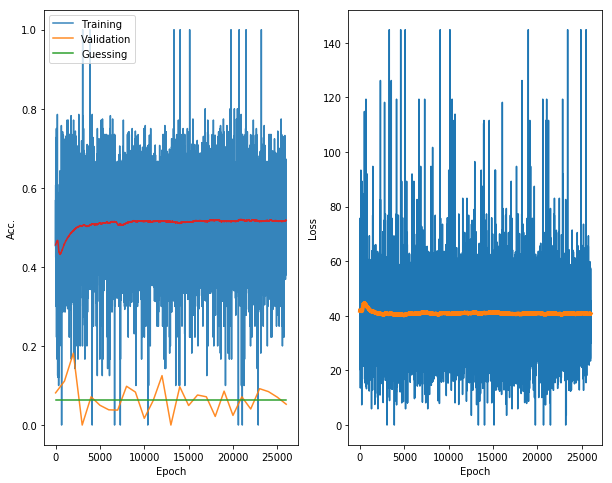

RMSE:  0.00818270740844
Ratio to zero-prediction:  0.980533954911
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51446521202742967)


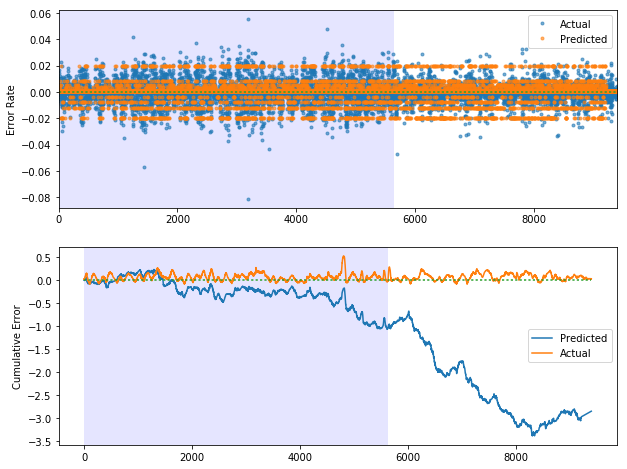

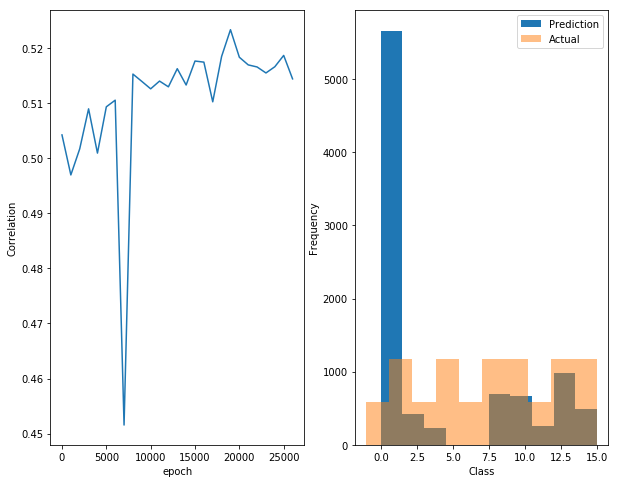

Step:  27000  Train Acc:  0.513977241732  Val Acc:  0.0454545 loss 40.8903165106 LR:  3.18128724102e-05


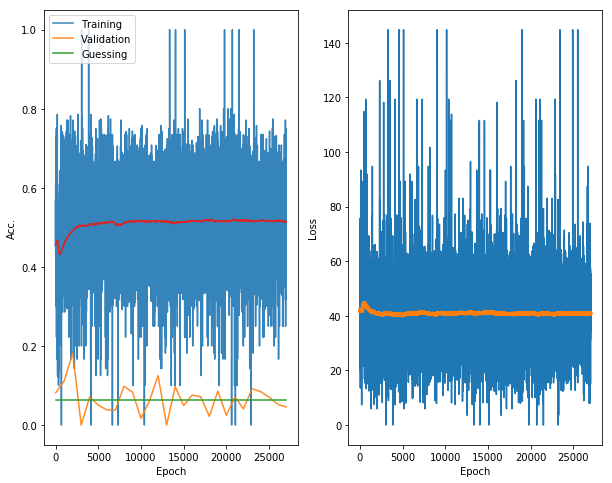

RMSE:  0.00816897962087
Ratio to zero-prediction:  0.978888953915
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51582167503698317)


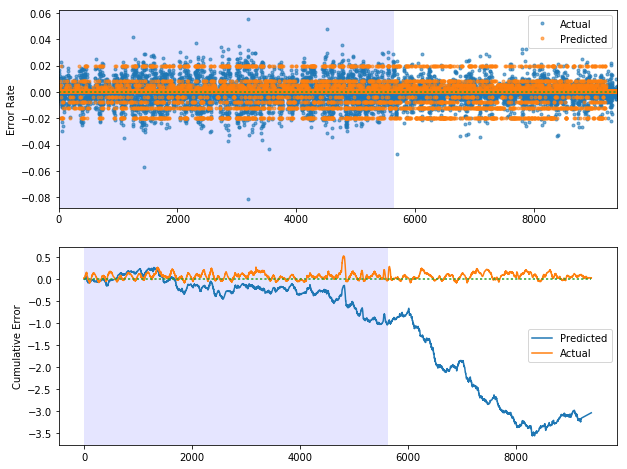

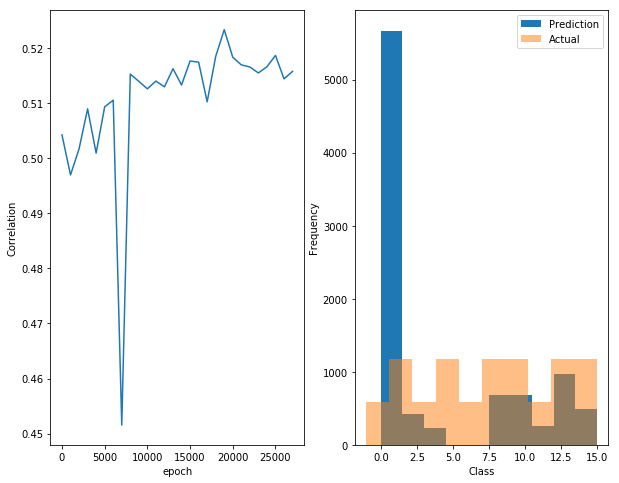

Step:  28000  Train Acc:  0.516423629616  Val Acc:  0.0434783 loss 40.7557016616 LR:  2.99420210095e-05


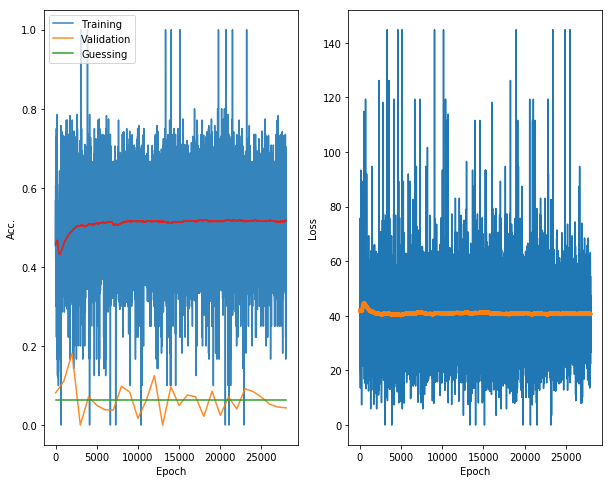

RMSE:  0.00815148035758
Ratio to zero-prediction:  0.976792016925
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51699398187645162)


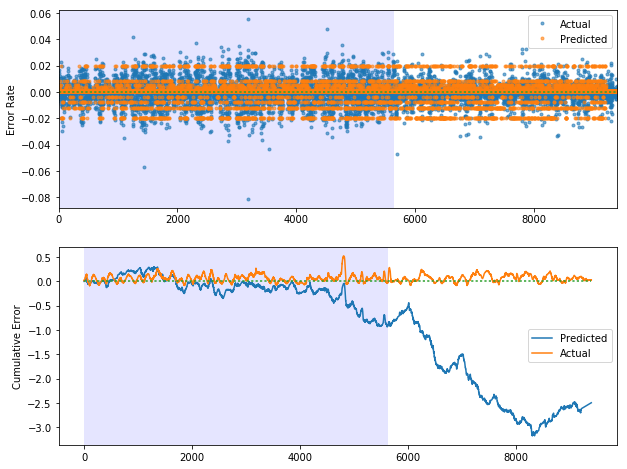

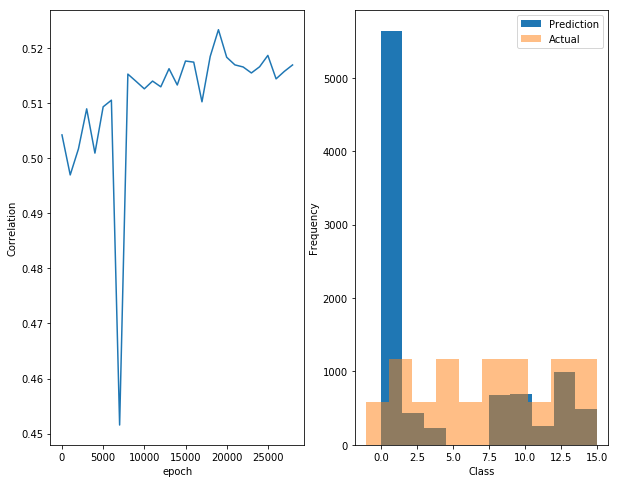

Step:  29000  Train Acc:  0.512365575419  Val Acc:  0.0689655 loss 41.215674127 LR:  2.8181190638e-05


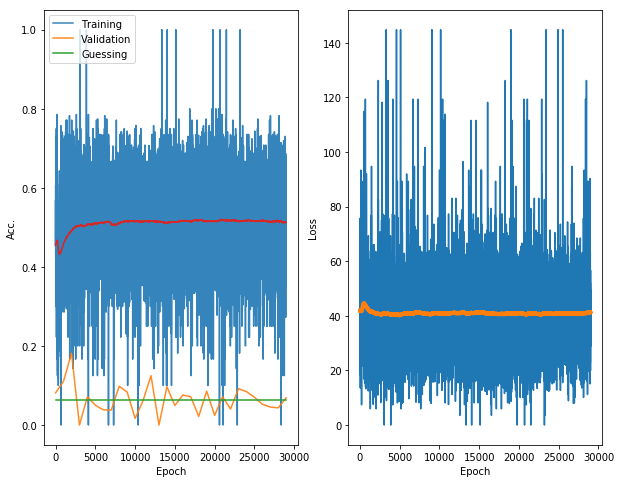

RMSE:  0.00804300060346
Ratio to zero-prediction:  0.963792886316
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.52572860496230922)


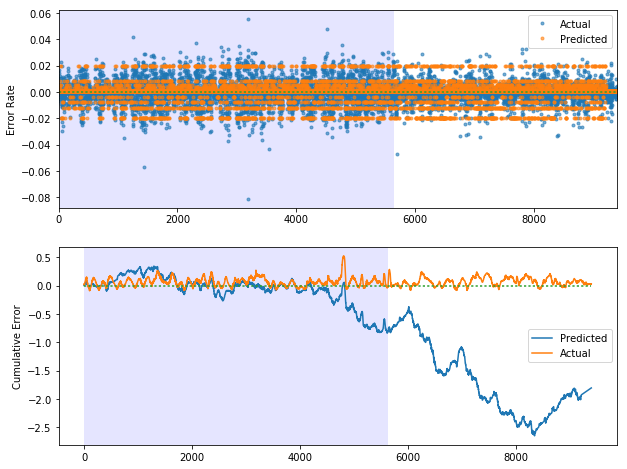

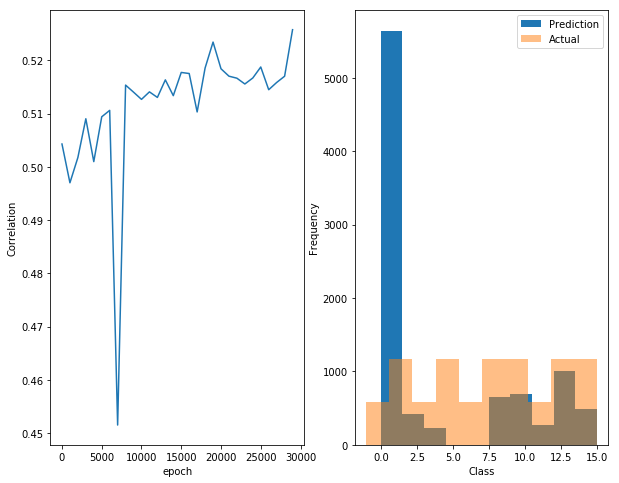

Step:  30000  Train Acc:  0.512949820322  Val Acc:  0.0681818 loss 41.4067045876 LR:  2.59934329554e-05


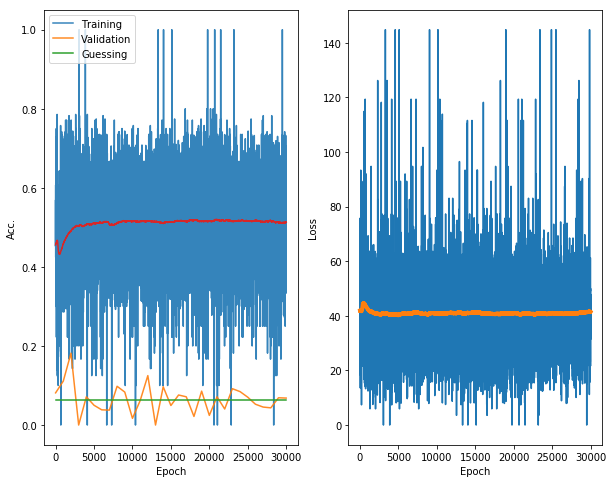

RMSE:  0.00809559571275
Ratio to zero-prediction:  0.970095359073
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.52212685939867176)


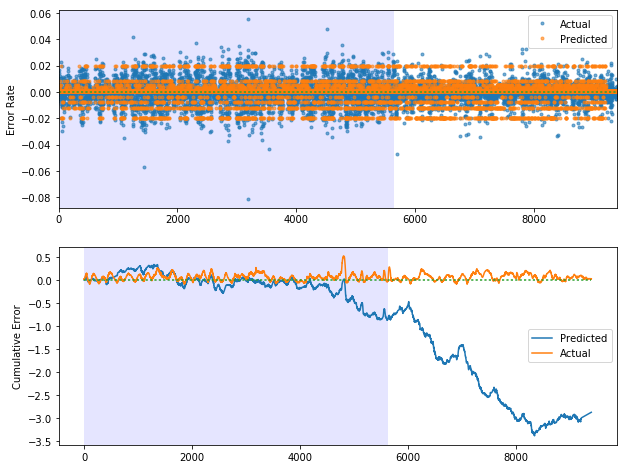

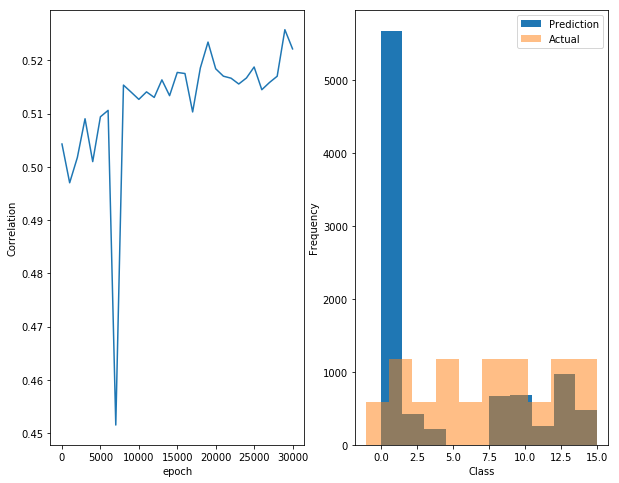

Step:  31000  Train Acc:  0.513675610918  Val Acc:  0.0 loss 41.3057310817 LR:  2.44648111501e-05


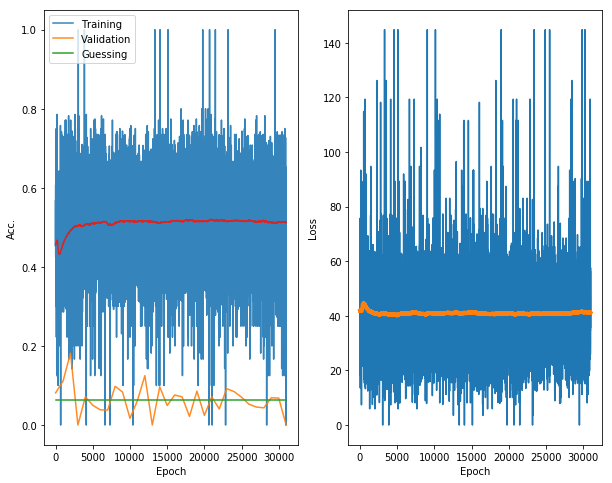

RMSE:  0.00813492166432
Ratio to zero-prediction:  0.974807788457
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.519769094597613)


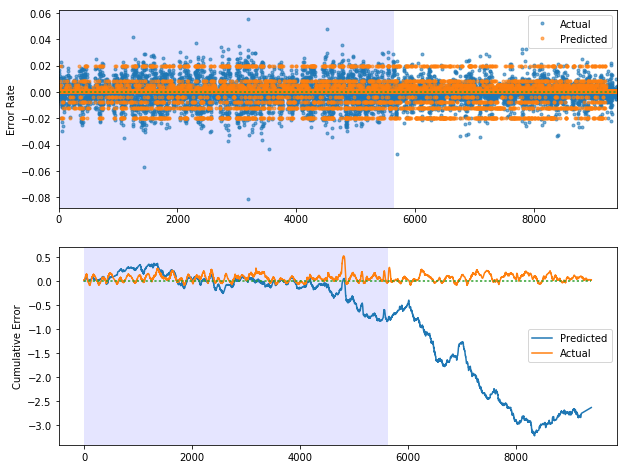

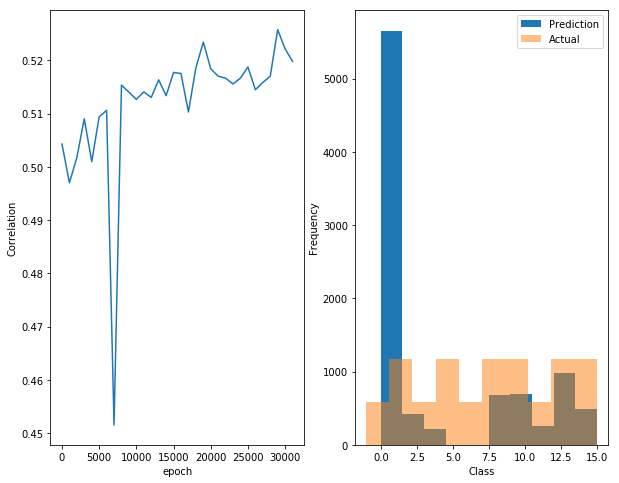

Step:  32000  Train Acc:  0.51405919066  Val Acc:  0.04 loss 41.082084651 LR:  2.3026084536e-05


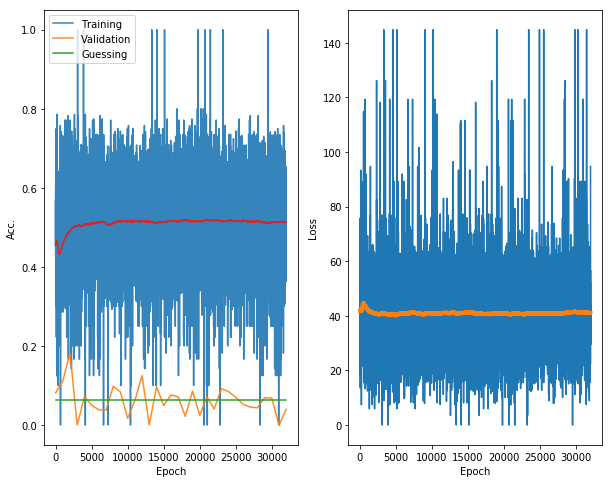

RMSE:  0.00817193902169
Ratio to zero-prediction:  0.97924357896
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51693640901115812)


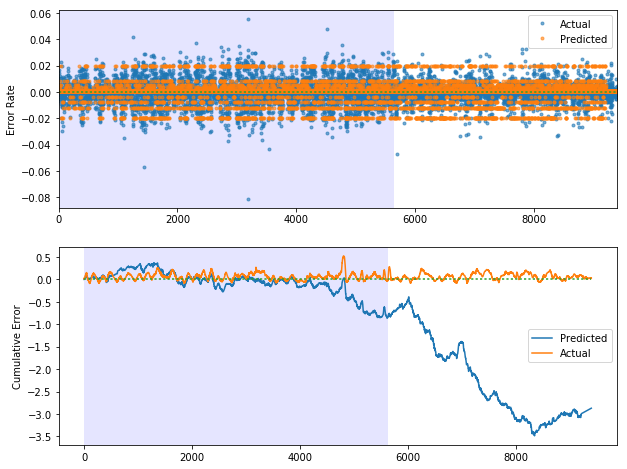

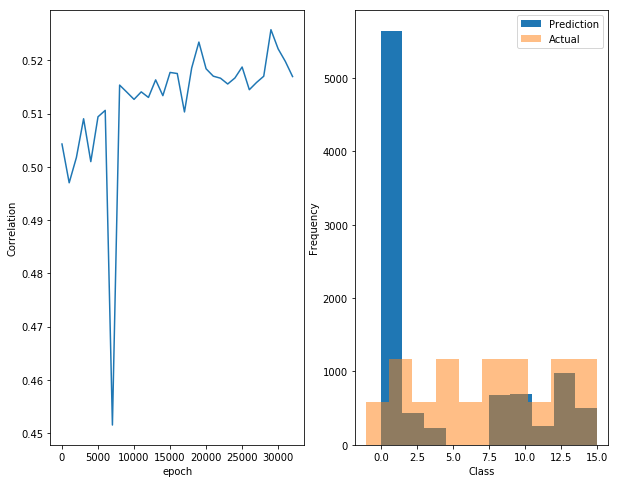

Step:  33000  Train Acc:  0.514190377044  Val Acc:  0.0465116 loss 41.2525028117 LR:  2.12385272255e-05


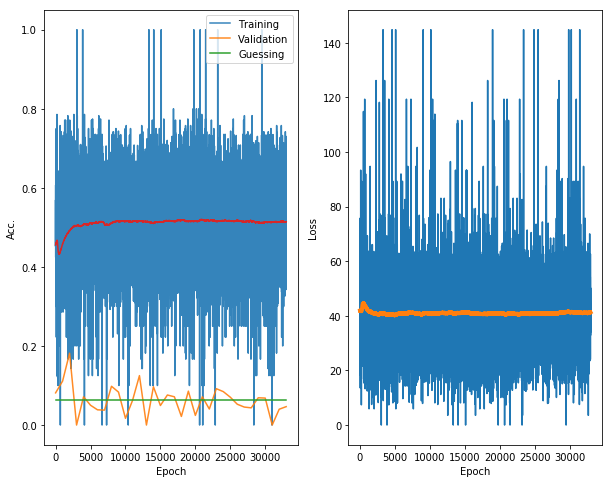

RMSE:  0.00804280002429
Ratio to zero-prediction:  0.963768850911
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.52585243257787906)


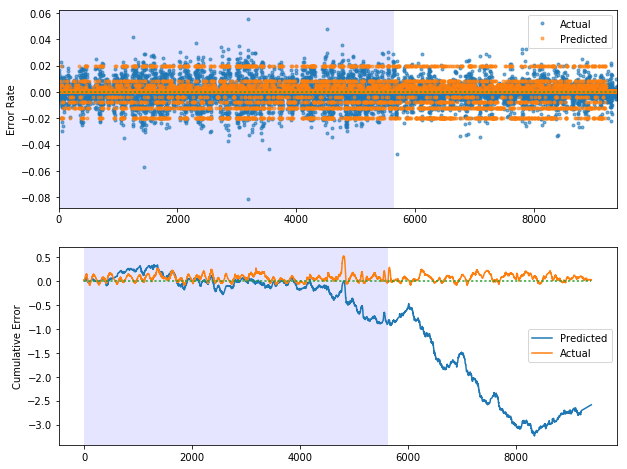

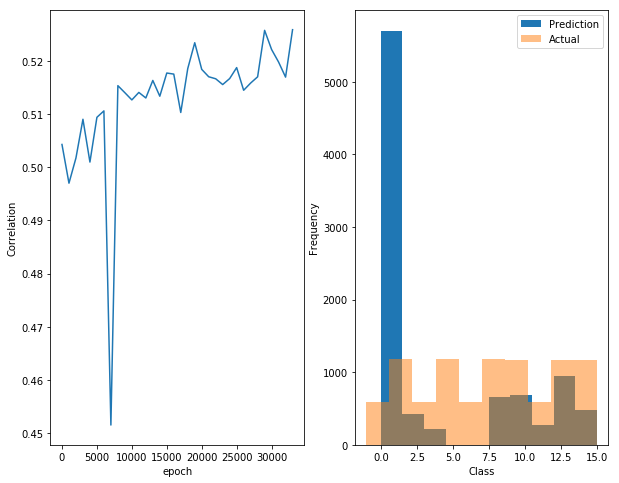

Step:  34000  Train Acc:  0.514708928568  Val Acc:  0.05 loss 41.2783382745 LR:  1.99895319164e-05


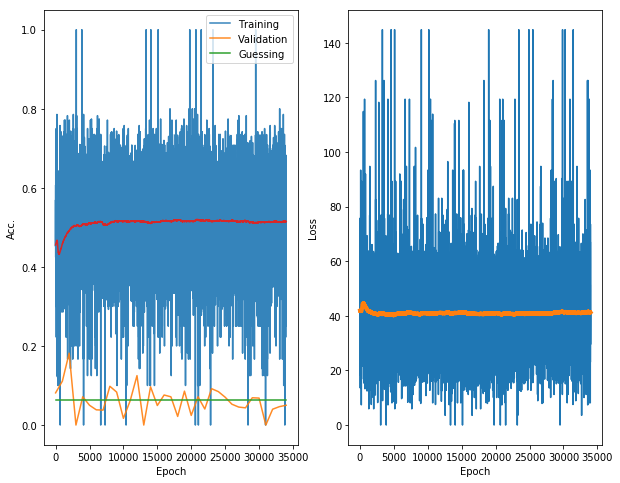

RMSE:  0.00813666312078
Ratio to zero-prediction:  0.975016467211
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.52113321440717864)


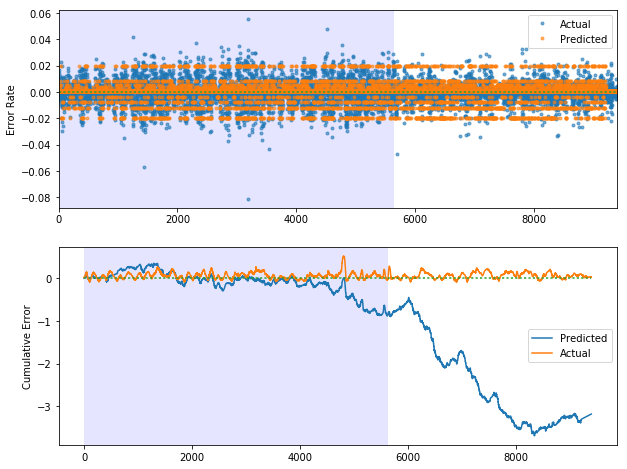

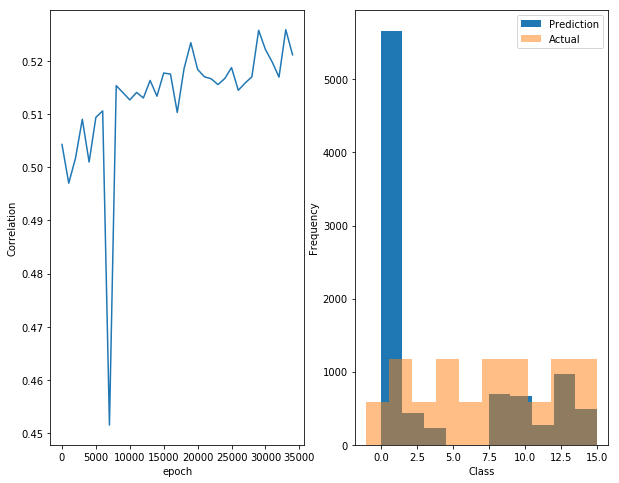

Step:  35000  Train Acc:  0.515408124259  Val Acc:  0.0540541 loss 40.7398051879 LR:  1.88139875235e-05


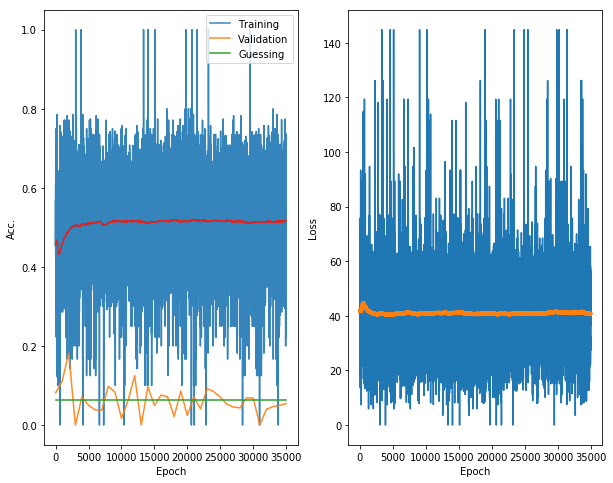

RMSE:  0.00814811922242
Ratio to zero-prediction:  0.976389252047
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51924467385559869)


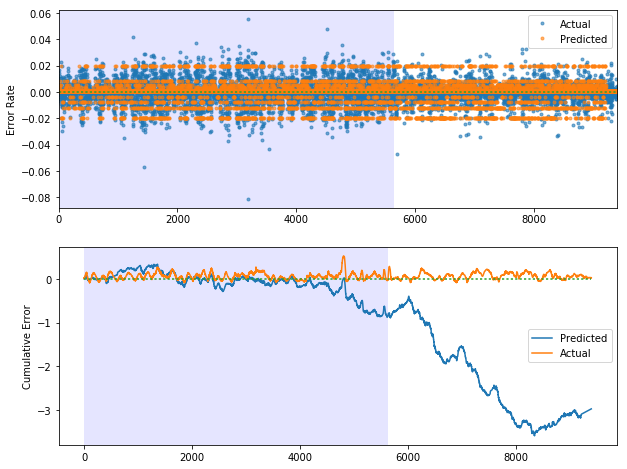

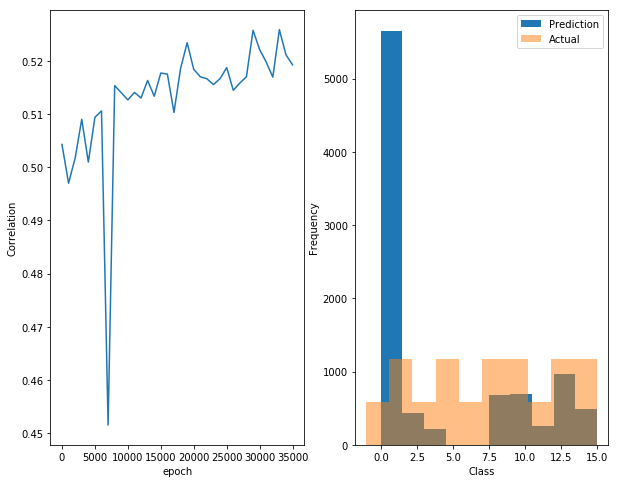

Step:  36000  Train Acc:  0.519615999212  Val Acc:  0.0263158 loss 40.5707984595 LR:  1.73534230543e-05


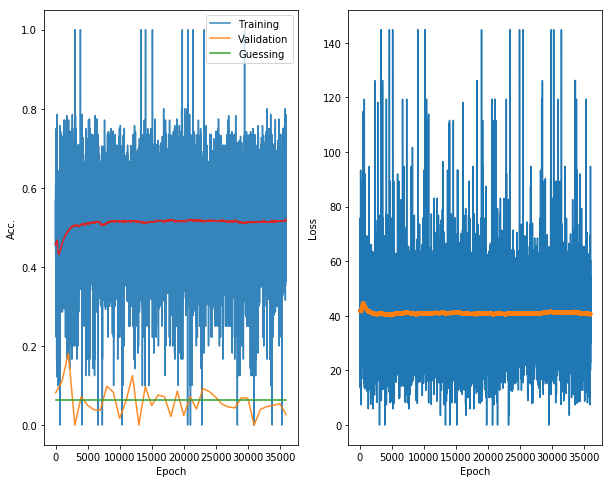

RMSE:  0.00813284702294
Ratio to zero-prediction:  0.974559184147
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51999239161716082)


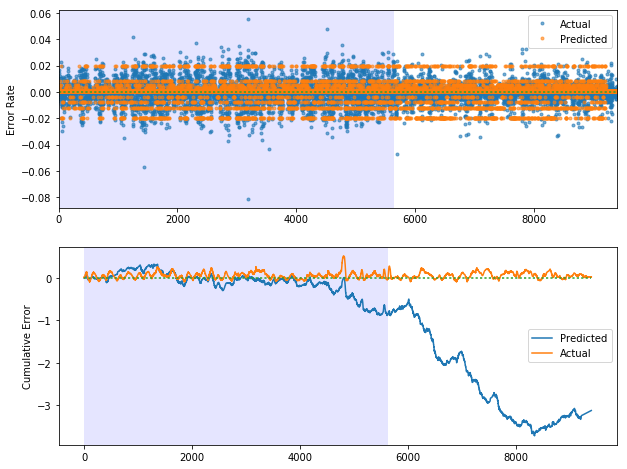

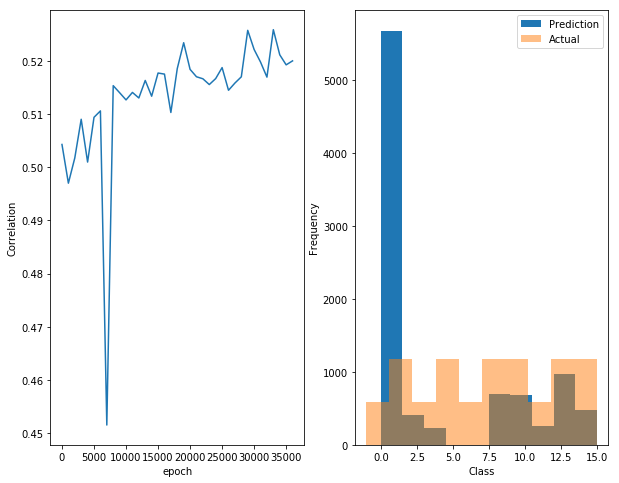

Step:  37000  Train Acc:  0.51888815585  Val Acc:  0.0769231 loss 40.7672932757 LR:  1.63329029513e-05


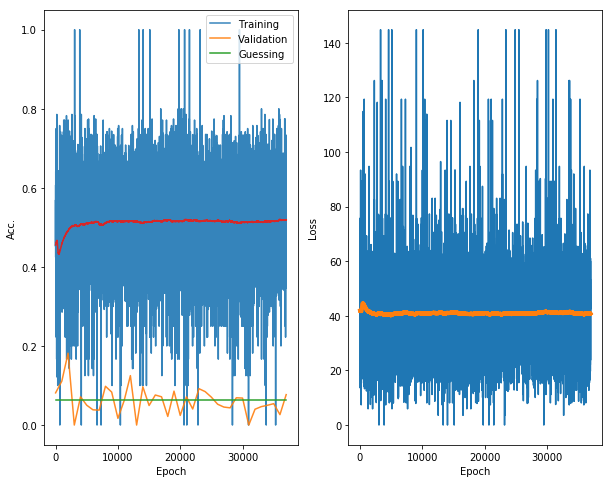

RMSE:  0.00812879945336
Ratio to zero-prediction:  0.974074163822
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.519562119242859)


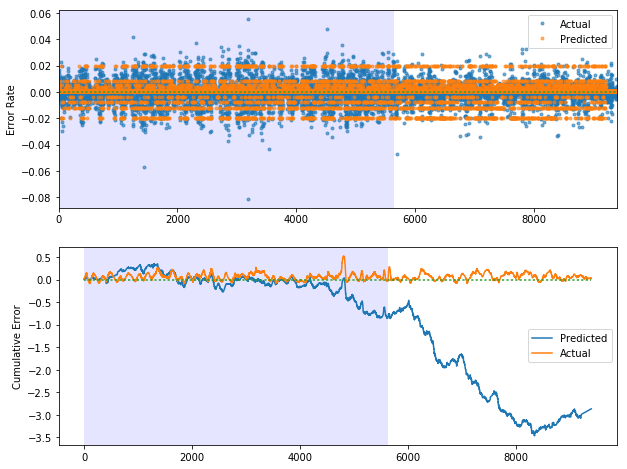

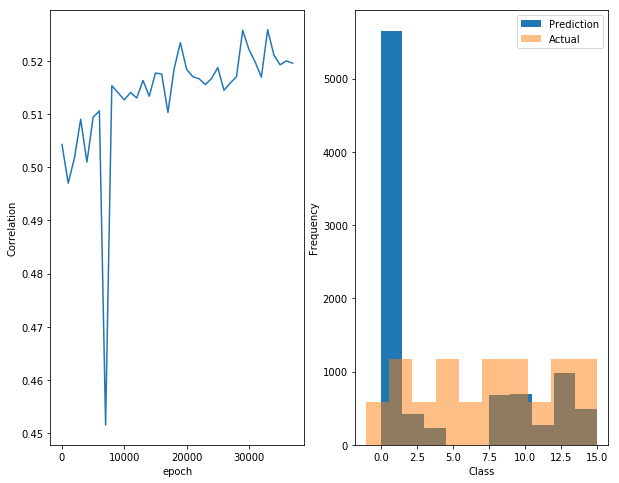

Step:  38000  Train Acc:  0.516399476528  Val Acc:  0.091954 loss 40.9676877192 LR:  1.53723975946e-05


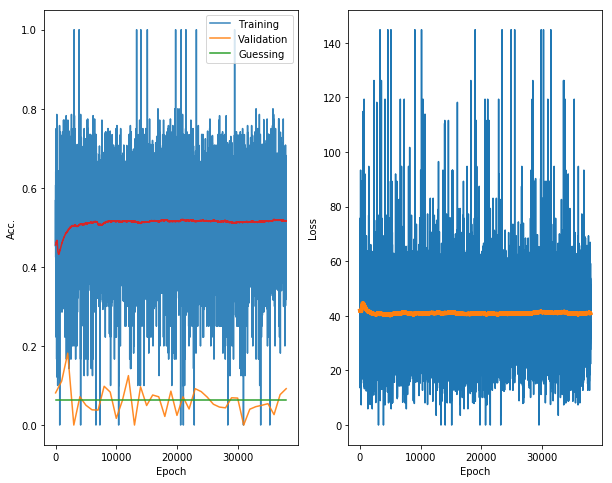

RMSE:  0.00820333576226
Ratio to zero-prediction:  0.983005850867
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51450537644043792)


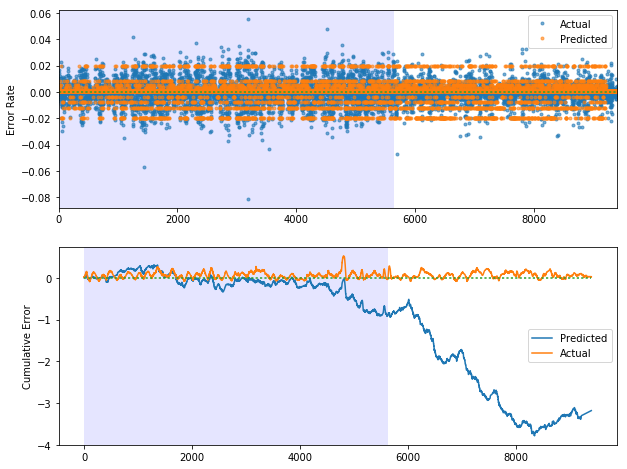

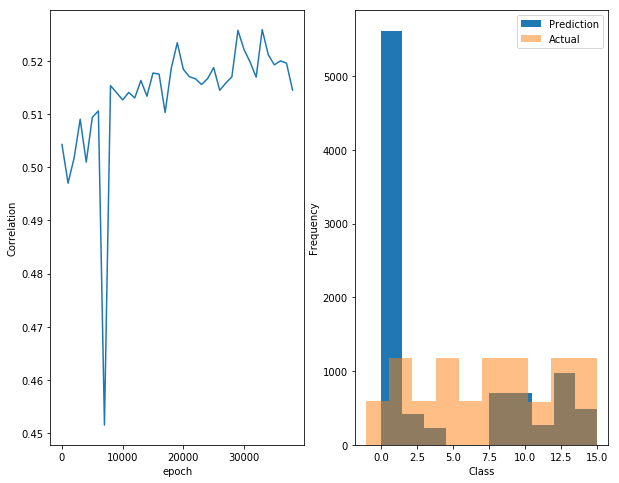

Step:  39000  Train Acc:  0.517002553078  Val Acc:  0.0769231 loss 41.0502767905 LR:  1.41790100841e-05


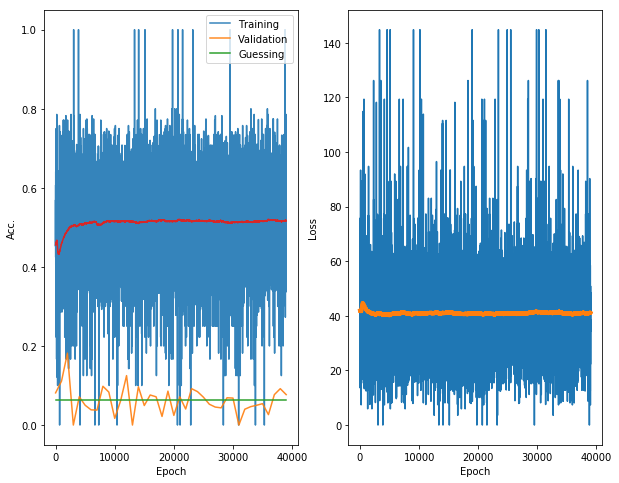

RMSE:  0.00815782786131
Ratio to zero-prediction:  0.977552638395
('plotting from ', 0, ' to ', 9400)
High correlation (near 1) means we are predicting well.
('Correlation between error and signal:', 0.51646733237356834)


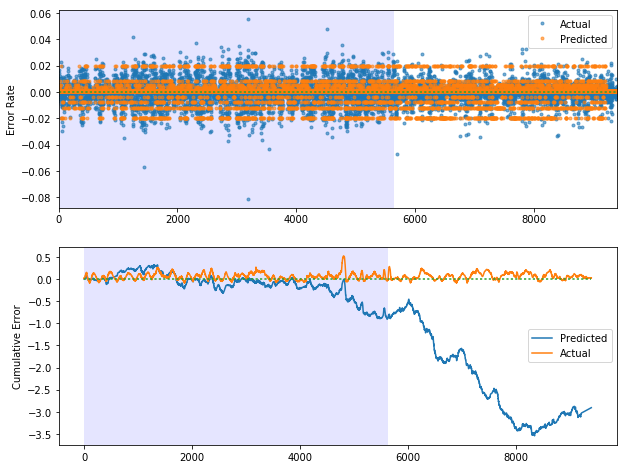

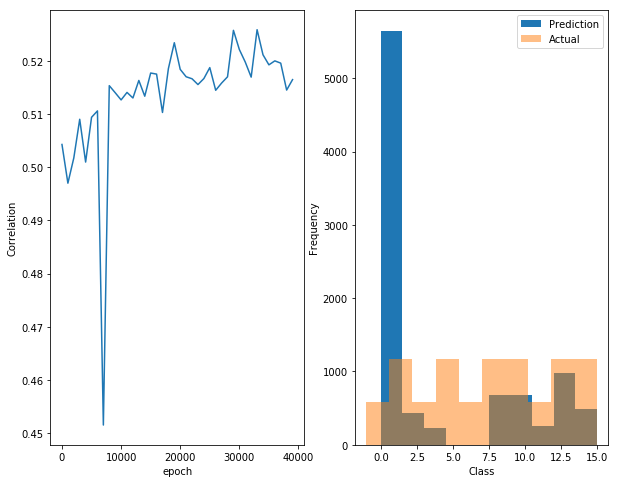

Done.


In [4]:
print(x_data.shape)
# simple parameters:
disp_period = 1000
training_iters = 40000
lr = 0.0002 # 0.0002 is a good value for 20 bins
lr_decay = 0.98

# Launch the graph
step = 1 
history = {'train_acc': [], 'train_loss': [], 's_tacc': [], 's_tloss': [], 'val_inds': [], 'val_acc':[], 'corr':[]}
smooth_val = 0.999

for step in range(training_iters):
    if step % 300 is 0:
        lr *= lr_decay
        saver.save(sess, 'classification_model', global_step = step)
    batch_x, batch_y = utilities.sample_seqbatch(BATCH_SIZE,1, x_train, y_train)
    o,loss,acc = sess.run([model.optimizer,model.loss, model.acc], feed_dict={model.image: batch_x, model.labels: batch_y, model.lr:[lr]})

    history["train_acc"].append(acc)
    history["train_loss"].append(loss)
    if(step is 0):
        history["s_tloss"].append(loss)
        history["s_tacc"].append(acc)
    else:
        history["s_tloss"].append(smooth_val*history["s_tloss"][-1] + (1-smooth_val)*loss)
        history["s_tacc"].append(smooth_val*history["s_tacc"][-1] + (1-smooth_val)*acc)

    if step % disp_period is 0:
        # Calculate val accuracy:
        batch_x, batch_y = utilities.sample_seqbatch(BATCH_SIZE,1, x_val, y_val)
        acc_v = sess.run(model.acc, feed_dict={model.image: batch_x, model.labels: batch_y})
        history["val_acc"].append(acc_v)
        history["val_inds"].append(step)

        print('Step: ', step, ' Train Acc: ', history["s_tacc"][-1], ' Val Acc: ', history["val_acc"][-1], 'loss', history["s_tloss"][-1], 'LR: ', lr)
        plt.subplot(1,2,1)
        plt.plot(history["train_acc"],alpha=0.9)
        plt.plot(history["val_inds"], history["val_acc"],alpha=0.9)
        plt.plot([0,step], [1/float(NUM_CLASSES),1/float(NUM_CLASSES)])
        plt.legend(['Training','Validation','Guessing'])
        plt.plot(history["s_tacc"])
        plt.xlabel('Epoch')
        plt.ylabel('Acc.')
        plt.subplot(1,2,2)
        plt.plot(history["train_loss"])
        plt.plot(history["s_tloss"], linewidth=4)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()

        # Prediction is cheap for this:
        y_pred = np.zeros_like(y_data)
        for k in range(0,x_data.shape[0]-(x_data.shape[0]%BATCH_SIZE),BATCH_SIZE):
            imgs = x_data[k:k+BATCH_SIZE,:,:]
            pred = sess.run(model.prediction, feed_dict={model.image: imgs, model.labels: y_norm[k:k+BATCH_SIZE]})
            y_pred[k:k+BATCH_SIZE] = pred
        prediction = mean_vals[(y_pred).astype(np.int32)];
        # hack:
        i_zero = np.where(prediction==0)
        prediction[i_zero] = 0
        # end hack
        print('RMSE: ', utilities.calc_rmse(prediction, y_norm))
        print('Ratio to zero-prediction: ', utilities.calc_rmse(prediction, y_norm)/utilities.calc_rmse(y_norm, np.zeros_like(y_norm)))
        c = utilities.plot_data(0,y_data.shape[0], prediction, y_norm, x_train.shape[0])
        history["corr"].append(c)
        
        plt.subplot(1,2,1)
        plt.plot(history["val_inds"], history["corr"])
        plt.ylabel('Correlation')
        plt.xlabel('epoch')
        
        plt.subplot(1,2,2)
        plt.hist(y_pred)
        plt.hist(y_data,alpha=0.5)
        plt.xlabel('Class')
        plt.ylabel('Frequency')
        plt.legend(['Prediction', 'Actual'])
        plt.show()

    # Compute sequence prediction:
print('Done.')


In [ ]:
# Reconstruct signal using a randomwalk model:
print('Computing sequence prediction - this may take a while. ')
y_pred = np.zeros_like(y_data)

for k in range(0,flows_data.shape[0]-(flows_data.shape[0]%BATCH_SIZE),BATCH_SIZE):
    if k % 1000 is 0:
        print('k = ', k)
    pred = sess.run(model.prediction, feed_dict={model.image: flows_data[k:k+BATCH_SIZE,:,:,:], model.labels: y_data[k:k+BATCH_SIZE]})
    y_pred[k:k+BATCH_SIZE] = pred
    


In [ ]:
# Can load a previously computed prediction - useful if cold starting a notebook.
r = mean_vals[(y_pred[:]).astype(np.int32)];
np.save('cnn_predictions',r)

y_norm = pos_err_rate

print('RMSE: ',utilities.calc_rmse(r, y_norm))

# smooth the reconstructed signal:
#r = np.zeros_like(reconstructed_signal)
#alpha = 1.0
#for k in range(reconstructed_signal.shape[0]):
#    if(k==0):
#        r[k] = reconstructed_signal[0]
#    else:
#        r[k] = alpha*reconstructed_signal[k] + (1-alpha)*r[k-1]
        
plt.plot(y_norm)
plt.plot(training_data_indices, r[training_data_indices],'.')
plt.plot(validation_data_indices, r[validation_data_indices],'.')
plt.legend(['Actual','Train','Val'])
plt.show()

#plt.title('Learning Curve')
#naive_val = 0
#for k in range(y_data.shape[0]):
#    naive_val += calc_rmse(y_data[k,:],np.zeros(OUTPUT_DIM))
#naive_val /= y_data.shape[0]

#plt.plot(train_history,'.',alpha=0.3)
#plt.plot(val_history,'.',alpha=0.3)
#plt.plot(naive_val*np.ones_like(train_history),':')
#plt.legend(['Training','Validation','Naive'])
#plt.xlabel('Epoch')
#plt.ylabel('RMSE')
#plt.show()


plot_data(0,y_data.shape[0])
plot_error(300,500)


In [ ]:
plt.plot(mean_vals[(y_pred[:]).astype(np.int32)])
print(y_pred.shape)

In [ ]:
    
    n_disc
    true_disc, mv = utilities.discretize_outputs(y_data, n_disc)
    
    
    plt.subplot(2,1,1);
    plt.plot(pos_err)
    plt.plot()
    plt.subplot(2,1,2)
#    plt.plot(y_data)
#    plt.plot(mean_vals[true_disc.astype(np.int32)],'o',alpha=0.3)
    plt.plot(mean_vals[y_pred.astype(np.int32)],'x',alpha=0.9)
#    plt.ylim([-0.02,0.02])
    plt.xlim([60000,70000])
    plt.show()
    plt.plot(d_raw[:,4],'.')
    plt.xlim([60000,70000])
    plt.show()
    
        
    plt.plot(mean_vals)
    plt.show()
